In [2]:
from collections import deque
from dqnagentv5 import DQNAgent
from environmentv5 import Environment
from honestagentv5 import HonestAgent
import gym
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import progressbar as pb
import random
import seaborn as sns
from selfishagentv5 import SelfishAgent
import torch
%matplotlib inline

In [3]:
rhos = [
(1/3, 0.33475494384765625),
(0.35, 0.36702728271484375),
(0.4, 0.47370147705078125),
(0.45, 0.6032638549804688)
]
ADOPT = 0
OVERRIDE = 1
WAIT = 2

# current rho
rho = 0.47370147705078125
def evalReward(reward):
    reward = (1 - rho) * reward[0] - rho * reward[1]
    return reward

In [4]:
mining_powers = [0.60, 0.40]
gammas = [0.5, 0.5]
T = 9
env = Environment(mining_powers, gammas, T)
max_blocks = int(1e4)
agents = [HonestAgent(), DQNAgent(state_size=2, action_size=3, seed=0)]
# agents = [HonestAgent(), SelfishAgent(T)]

In [11]:
def runTurn(eps, verbose=0):
    turn_reward = 0
    current_player = env.getNextBlockWinner()
    current_player_state = env.getState(current_player)
    current_player_action = agents[current_player].act(current_player_state, eps)
    if verbose: 
        print('current chain: ', env.chain)
        print(current_player, current_player_state, current_player_action)
    new_state, reward = env.takeActionPlayer(current_player, current_player_action)
    reward_val = evalReward(reward)
    agents[current_player].step(
        current_player_state, current_player_action, reward_val, new_state)
    if current_player == 1:
        turn_reward += reward_val
    if (current_player_action == OVERRIDE) and (current_player_state[0] > current_player_state[1]):
        turn_queue = deque()
        [turn_queue.append(i) for i in range(len(mining_powers)) if i != current_player]
        while len(turn_queue):    
            current_player = turn_queue.pop()
            current_player_state = env.getState(current_player)
            current_player_action = agents[current_player].act(current_player_state, eps)
            if verbose: print(current_player, current_player_state, current_player_action)
            new_state, reward = env.takeActionPlayer(current_player, current_player_action)
            reward_val = evalReward(reward)
            agents[current_player].step(
                current_player_state, current_player_action, reward_val, new_state)
            if current_player == 1:
                turn_reward += reward_val
            if (current_player_action == OVERRIDE) and (current_player_state[0] > current_player_state[1]):
                [turn_queue.append(i) for i in range(len(mining_powers)) if i != current_player]
        if verbose: print('next chain: ', env.chain)
    return turn_reward

In [6]:
def plotPolicy(agent):
    # plot 
    policy = agent.extractPolicy()
    f, ax = plt.subplots(figsize=(3,3))
    ax.imshow(policy)
    ax = sns.heatmap(policy, annot=True)
    cb = ax.collections[-1].colorbar   
    cb.remove()
    plt.xticks([])
    plt.yticks([])
    plt.show()

## Learning

0.995 -1147.2050323486328


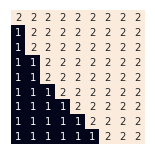

0.990025 -1063.2014236450195


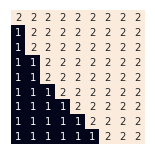

0.985074875 -1173.4154205322266


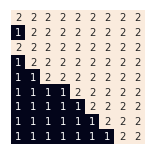

0.9801495006250001 -1163.099838256836


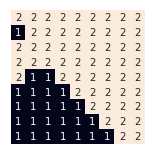

0.9752487531218751 -969.9880828857422


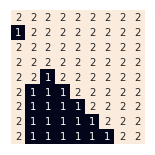

0.9703725093562657 -1067.67578125


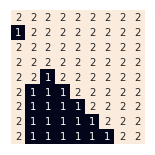

0.9655206468094844 -1033.9377822875977


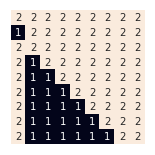

0.960693043575437 -1013.0949172973633


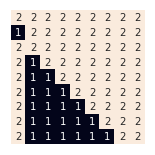

0.9558895783575597 -1048.1484985351562


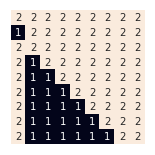

0.9511101304657719 -1018.463752746582


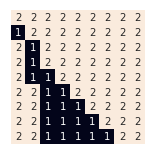

0.946354579813443 -1180.416404724121


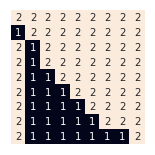

0.9416228069143757 -1147.9933319091797


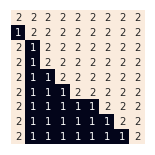

0.9369146928798039 -1011.8319320678711


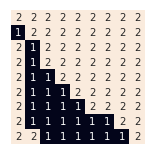

0.9322301194154049 -1081.2020797729492


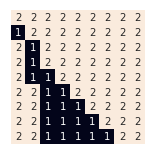

0.9275689688183278 -981.6205596923828


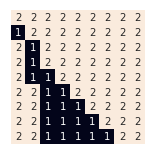

0.9229311239742362 -1042.8851852416992


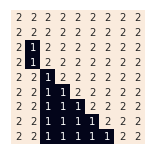

0.918316468354365 -1107.466049194336


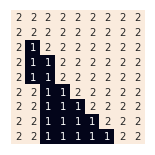

0.9137248860125932 -1071.8864974975586


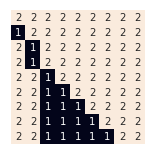

0.9091562615825302 -1147.2043762207031


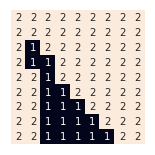

0.9046104802746175 -974.8825607299805


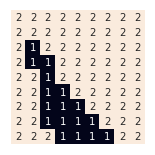

0.9000874278732445 -1095.0452728271484


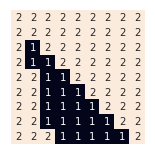

0.8955869907338783 -1035.4114837646484


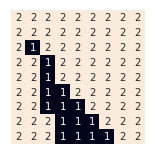

0.8911090557802088 -988.4098434448242


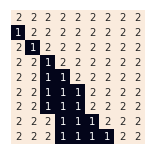

0.8866535105013078 -1035.7799911499023


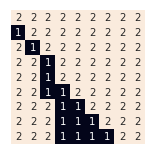

0.8822202429488013 -1024.8848571777344


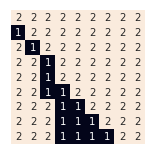

0.8778091417340573 -1030.727066040039


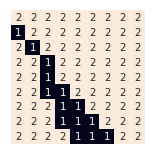

0.8734200960253871 -1026.149154663086


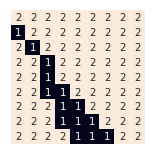

0.8690529955452602 -952.3569183349609


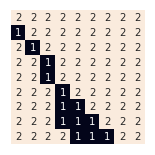

0.8647077305675338 -924.6718444824219


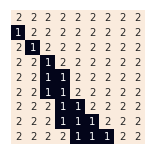

0.8603841919146962 -977.883544921875


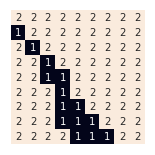

0.8560822709551227 -1050.9381103515625


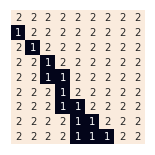

0.851801859600347 -986.7257537841797


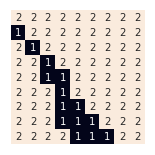

0.8475428503023453 -1069.729362487793


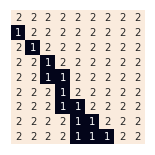

0.8433051360508336 -969.1465301513672


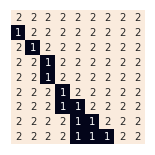

0.8390886103705794 -898.4594879150391


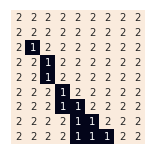

0.8348931673187264 -1069.6228561401367


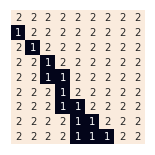

0.8307187014821328 -952.72509765625


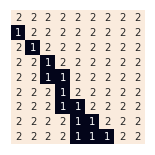

0.8265651079747222 -803.7717895507812


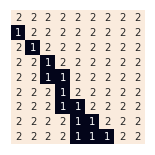

0.8224322824348486 -919.0390396118164


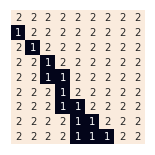

0.8183201210226743 -884.6698760986328


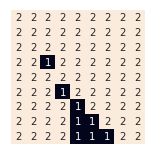

0.8142285204175609 -960.0406799316406


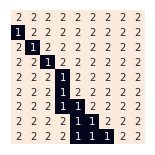

0.810157377815473 -959.0936050415039


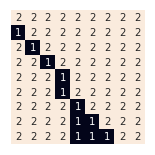

0.8061065909263957 -993.0945892333984


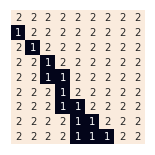

0.8020760579717637 -946.0393676757812


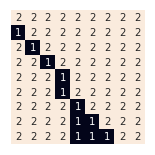

0.798065677681905 -960.3572463989258


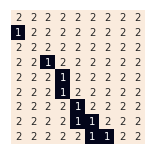

0.7940753492934954 -945.4608001708984


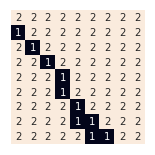

0.7901049725470279 -983.4098434448242


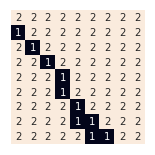

0.7861544476842928 -921.4075469970703


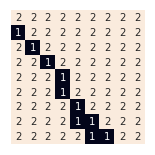

0.7822236754458713 -963.4085311889648


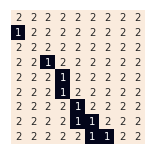

0.778312557068642 -1038.67578125


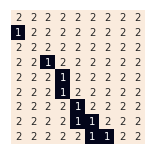

0.7744209942832988 -994.7790069580078


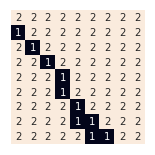

0.7705488893118823 -842.8799362182617


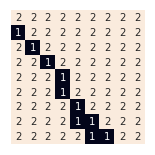

0.7666961448653229 -862.7218170166016


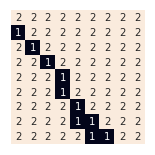

0.7628626641409962 -878.5120849609375


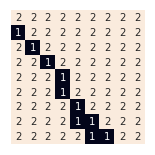

0.7590483508202912 -878.196174621582


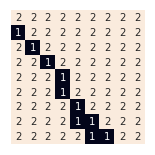

0.7552531090661897 -866.5646820068359


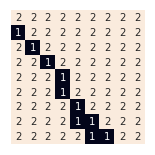

0.7514768435208588 -916.2500839233398


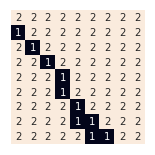

0.7477194593032545 -870.3013687133789


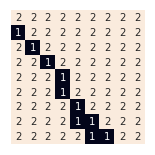

0.7439808620067382 -843.9848022460938


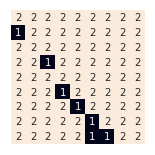

0.7402609576967045 -858.8273391723633


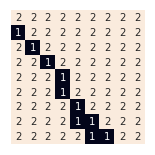

0.736559652908221 -929.0406799316406


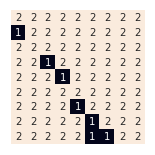

0.7328768546436799 -820.5094604492188


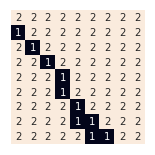

0.7292124703704616 -923.1445617675781


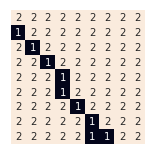

0.7255664080186093 -818.1412811279297


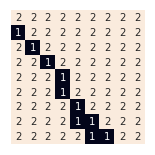

0.7219385759785162 -907.6182632446289


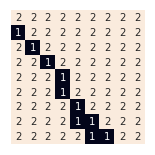

0.7183288830986236 -831.3519973754883


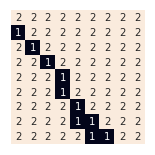

0.7147372386831305 -895.4594879150391


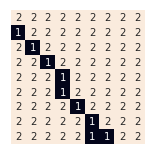

0.7111635524897149 -858.8802642822266


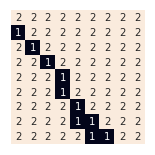

0.7076077347272662 -824.1409530639648


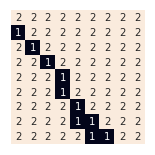

0.7040696960536299 -822.0364151000977


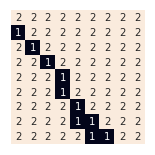

0.7005493475733617 -868.0383834838867


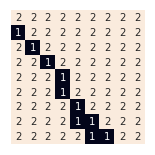

0.697046600835495 -893.7218170166016


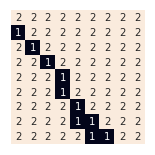

0.6935613678313175 -808.1935501098633


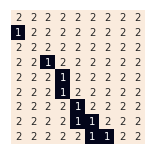

0.6900935609921609 -935.4601440429688


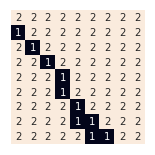

0.6866430931872001 -824.0886840820312


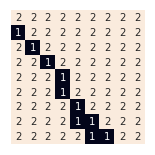

0.6832098777212641 -779.665283203125


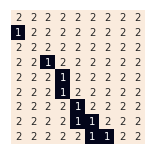

0.6797938283326578 -837.2471313476562


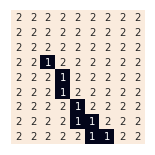

0.6763948591909945 -855.7205047607422


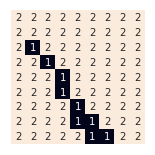

0.6730128848950395 -746.5065078735352


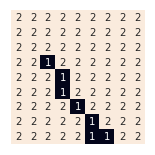

0.6696478204705644 -780.243522644043


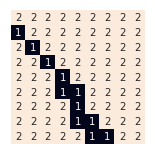

0.6662995813682115 -847.2994003295898


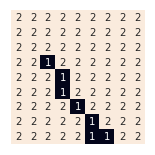

0.6629680834613705 -820.4558792114258


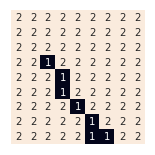

0.6596532430440636 -898.352653503418


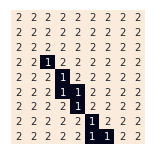

0.6563549768288433 -836.4558792114258


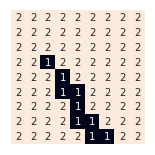

0.653073201944699 -813.1396408081055


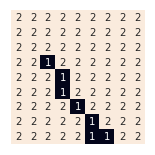

0.6498078359349755 -740.6633148193359


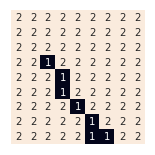

0.6465587967553006 -760.8750152587891


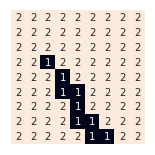

0.6433260027715241 -820.7185363769531


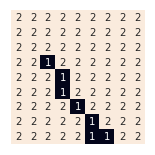

0.6401093727576664 -825.1402969360352


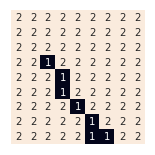

0.6369088258938781 -760.4009857177734


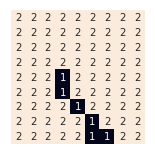

0.6337242817644086 -708.7152557373047


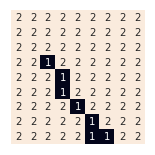

0.6305556603555866 -766.4003295898438


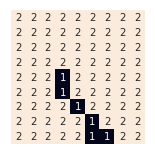

0.6274028820538087 -779.1909255981445


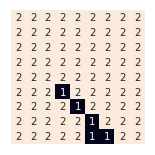

0.6242658676435396 -820.4545669555664


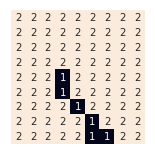

0.6211445383053219 -768.926628112793


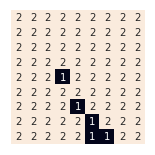

0.6180388156137953 -778.1905975341797


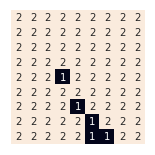

0.6149486215357263 -756.3477325439453


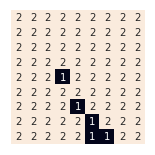

0.6118738784280476 -747.3467483520508


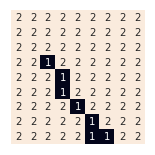

0.6088145090359074 -825.5078201293945


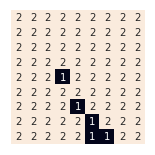

0.6057704364907278 -697.2405700683594


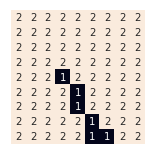

0.6027415843082742 -731.2934951782227


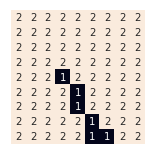

0.5997278763867329 -743.3474044799805


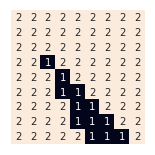

0.5967292370047992 -747.0831069946289


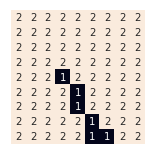

0.5937455908197752 -705.8720626831055


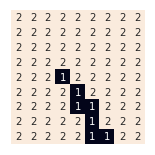

0.5907768628656763 -683.2921829223633


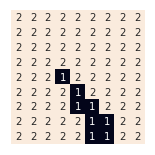

0.5878229785513479 -729.4509582519531


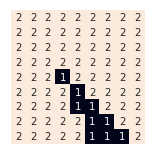

0.5848838636585911 -658.5551681518555


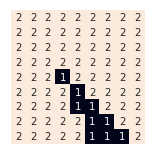

0.5819594443402982 -752.0844192504883


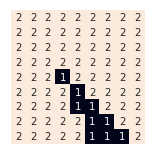

0.5790496471185967 -706.3460922241211


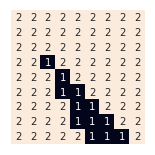

0.5761543988830038 -808.5078201293945


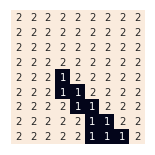

0.5732736268885887 -781.6110458374023


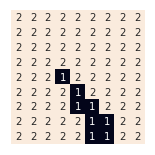

0.5704072587541458 -804.8217620849609


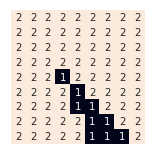

0.567555222460375 -676.4503021240234


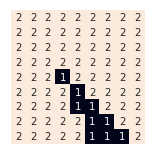

0.5647174463480732 -669.3973770141602


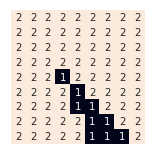

0.5618938591163328 -679.9243316650391


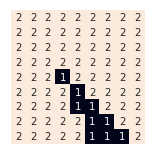

0.5590843898207511 -732.2408981323242


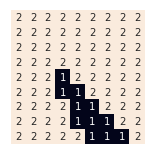

0.5562889678716474 -678.6084213256836


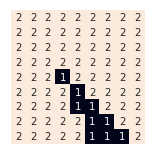

0.5535075230322891 -693.9772567749023


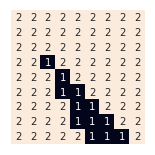

0.5507399854171277 -690.7142715454102


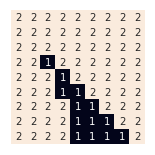

0.547986285490042 -678.7649002075195


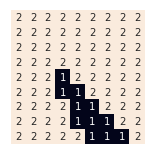

0.5452463540625918 -630.9752883911133


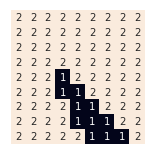

0.5425201222922789 -735.0837631225586


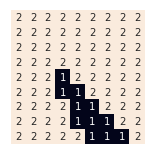

0.5398075216808175 -740.7149276733398


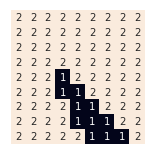

0.5371084840724134 -717.3454360961914


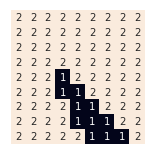

0.5344229416520513 -662.7123031616211


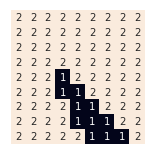

0.531750826943791 -742.4516143798828


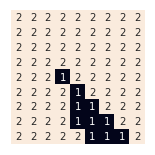

0.5290920728090721 -707.3451080322266


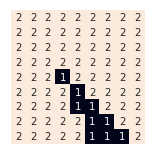

0.5264466124450268 -639.975944519043


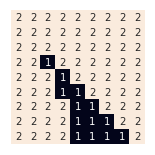

0.5238143793828016 -616.5002746582031


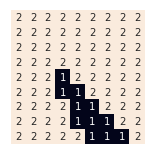

0.5211953074858876 -731.7675247192383


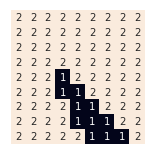

0.5185893309484582 -723.6090774536133


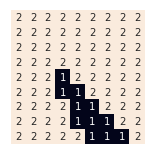

0.5159963842937159 -673.7652282714844


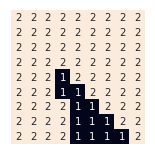

0.5134164023722473 -724.0824508666992


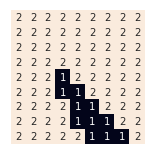

0.510849320360386 -624.92236328125


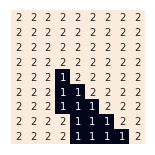

0.5082950737585841 -631.2902145385742


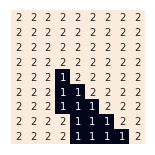

0.5057535983897912 -727.0311660766602


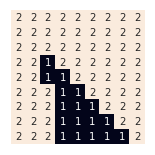

0.5032248303978422 -652.92236328125


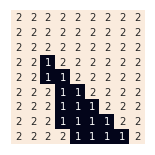

0.500708706245853 -679.1347198486328


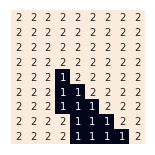

0.4982051627146237 -636.4480056762695


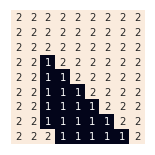

0.49571413690105054 -631.5009307861328


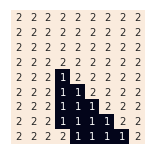

0.4932355662165453 -592.8684539794922


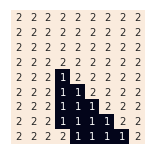

0.4907693883854626 -657.2915267944336


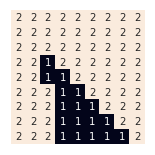

0.4883155414435353 -574.0788421630859


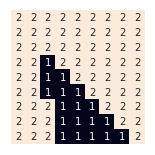

0.4858739637363176 -627.8178253173828


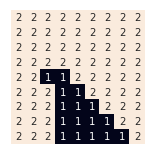

0.483444593917636 -637.9226913452148


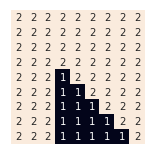

0.4810273709480478 -667.5015869140625


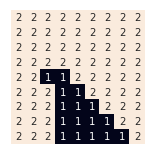

0.47862223409330756 -626.1317672729492


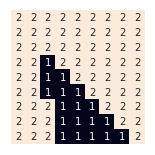

0.47622912292284103 -689.3973770141602


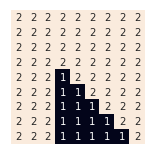

0.4738479773082268 -548.551887512207


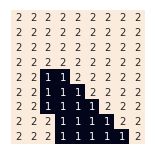

0.47147873742168567 -618.1311111450195


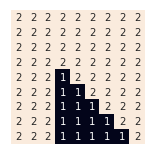

0.46912134373457726 -614.9746322631836


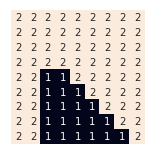

0.46677573701590436 -570.7086944580078


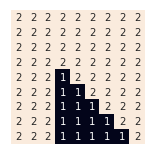

0.46444185833082485 -492.9703674316406


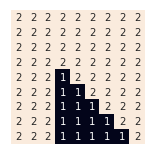

0.46211964903917074 -600.8161849975586


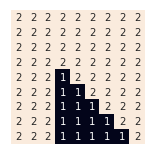

0.4598090507939749 -549.9194107055664


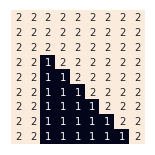

0.457510005540005 -546.6560974121094


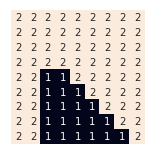

0.45522245551230495 -586.4473495483398


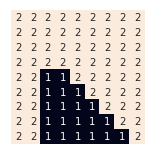

0.4529463432347434 -609.8158569335938


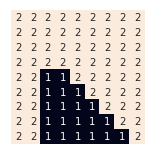

0.4506816115185697 -611.4466934204102


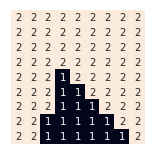

0.4484282034609769 -589.2889022827148


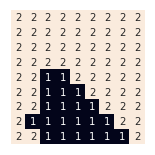

0.446186062443672 -544.2875900268555


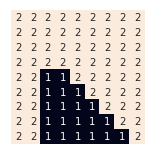

0.4439551321314536 -613.60546875


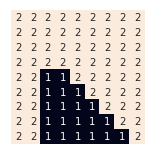

0.4417353564707963 -584.5522155761719


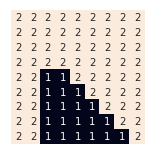

0.43952667968844233 -545.2346649169922


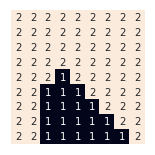

0.43732904629000013 -598.0788421630859


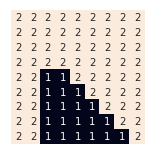

0.4351424010585501 -575.8677978515625


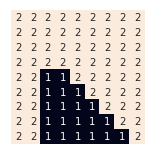

0.43296668905325736 -587.0255889892578


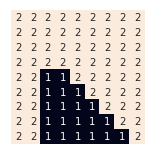

0.43080185560799106 -551.3408432006836


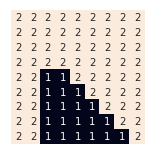

0.4286478463299511 -581.2902145385742


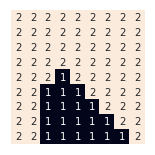

0.42650460709830135 -490.39147186279297


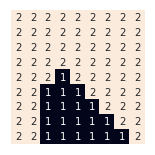

0.42437208406280985 -573.4986343383789


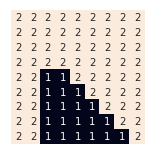

0.4222502236424958 -554.6044845581055


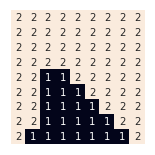

0.42013897252428334 -576.1297988891602


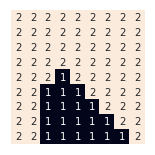

0.4180382776616619 -507.70672607421875


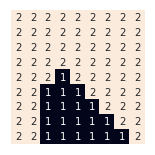

0.4159480862733536 -556.9203948974609


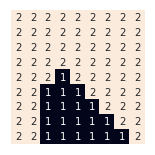

0.41386834584198684 -530.9716796875


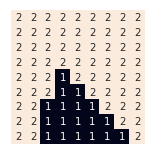

0.4117990041127769 -445.337890625


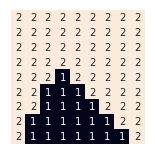

0.40974000909221303 -603.9200668334961


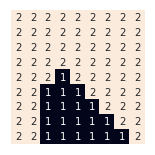

0.40769130904675194 -571.393440246582


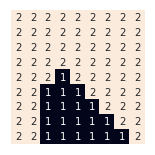

0.40565285250151817 -595.7096786499023


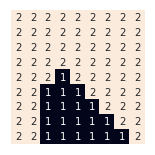

0.4036245882390106 -541.0236206054688


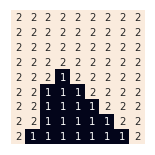

0.4016064652978155 -543.9713516235352


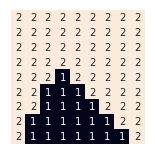

0.3995984329713264 -451.4940414428711


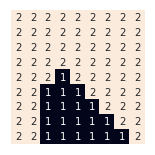

0.3976004408064698 -488.9693832397461


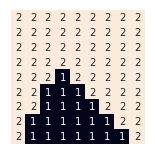

0.39561243860243744 -476.0226364135742


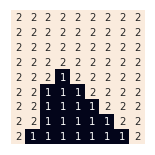

0.3936343764094253 -601.2889022827148


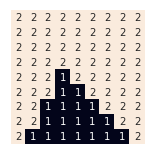

0.39166620452737816 -470.5486068725586


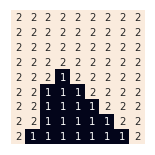

0.3897078735047413 -512.6015319824219


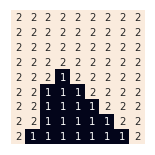

0.3877593341372176 -493.0742492675781


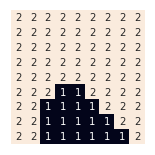

0.3858205374665315 -496.86451721191406


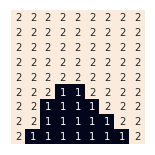

0.38389143477919885 -521.2333526611328


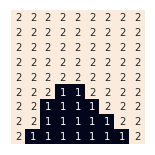

0.3819719776053028 -543.8664855957031


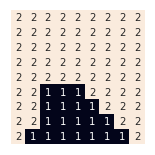

0.3800621177172763 -601.6564254760742


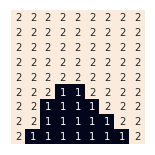

0.37816180712868996 -553.1281585693359


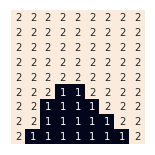

0.37627099809304654 -589.866813659668


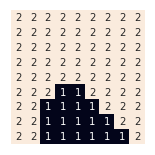

0.3743896431025813 -529.8661575317383


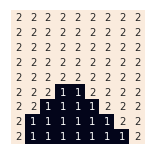

0.37251769488706843 -554.7073822021484


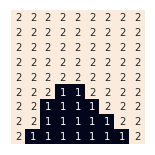

0.3706551064126331 -602.9729919433594


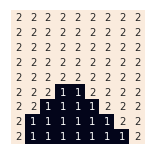

0.36880183088056995 -463.7054138183594


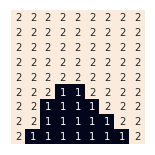

0.3669578217261671 -584.7606353759766


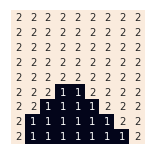

0.36512303261753626 -529.3908157348633


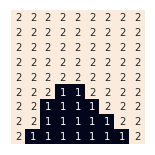

0.3632974174544486 -499.23302459716797


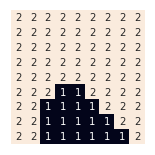

0.3614809303671764 -528.0232925415039


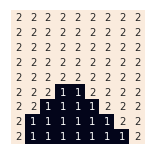

0.3596735257153405 -539.549919128418


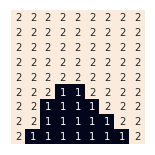

0.3578751580867638 -497.54827880859375


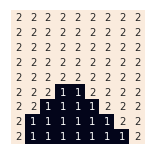

0.35608578229633 -458.7047576904297


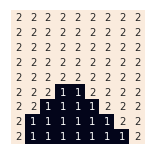

0.3543053533848483 -491.8638610839844


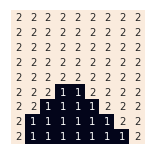

0.35253382661792404 -498.54827880859375


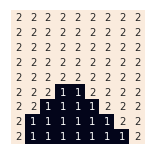

0.3507711574848344 -536.9703674316406


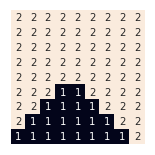

0.34901730169741024 -514.9706954956055


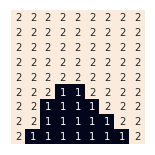

0.3472722151889232 -467.07457733154297


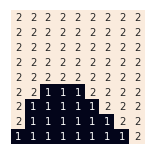

0.3455358541129786 -483.8632049560547


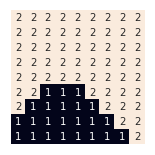

0.3438081748424137 -436.54762268066406


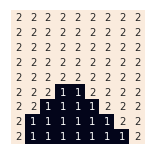

0.3420891339682016 -409.75604248046875


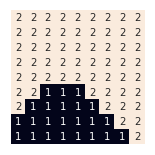

0.3403786882983606 -527.8112640380859


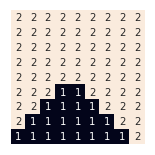

0.3386767948568688 -500.1278305053711


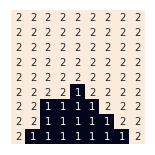

0.33698341088258443 -497.39048767089844


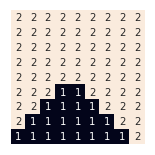

0.3352984938281715 -504.12750244140625


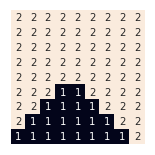

0.33362200135903064 -430.9680709838867


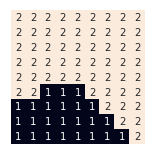

0.33195389135223546 -583.5509033203125


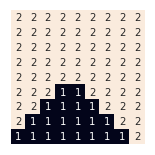

0.3302941218954743 -422.38819122314453


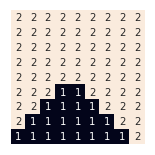

0.32864265128599696 -492.6531448364258


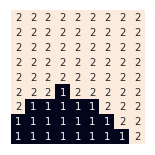

0.326999438029567 -520.337890625


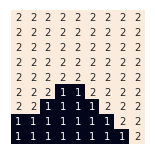

0.3253644408394192 -461.02198028564453


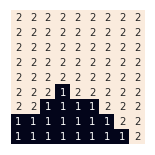

0.3237376186352221 -427.23072814941406


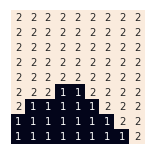

0.322118930542046 -467.179443359375


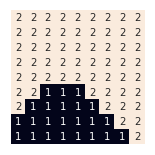

0.32050833588933575 -435.80896759033203


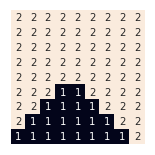

0.31890579420988907 -441.33592224121094


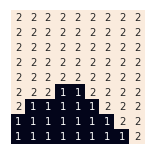

0.3173112652388396 -411.0203399658203


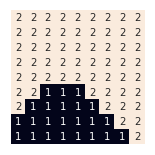

0.3157247089126454 -417.5989074707031


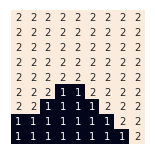

0.3141460853680822 -421.6508483886719


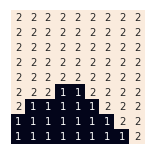

0.3125753549412418 -489.07359313964844


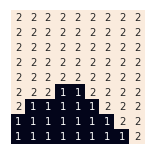

0.31101247816653554 -410.8096237182617


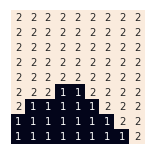

0.30945741577570285 -492.9158020019531


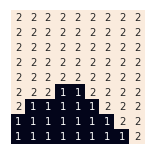

0.3079101286968243 -519.0749053955078


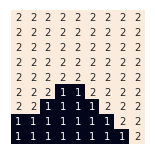

0.3063705780533402 -394.43980407714844


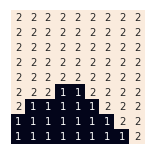

0.30483872516307353 -387.0709686279297


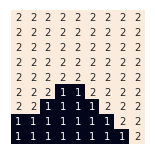

0.3033145315372582 -527.2323684692383


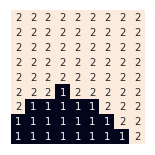

0.3017979588795719 -449.38917541503906


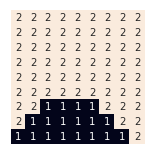

0.30028896908517405 -397.1232376098633


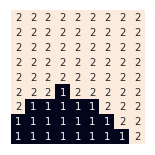

0.2987875242397482 -392.8609085083008


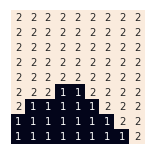

0.29729358661854943 -463.9687271118164


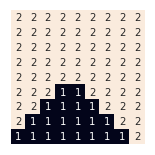

0.29580711868545667 -484.60054779052734


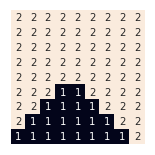

0.2943280830920294 -427.5995635986328


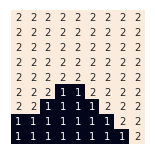

0.29285644267656924 -386.5972671508789


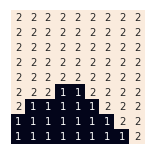

0.2913921604631864 -440.96741485595703


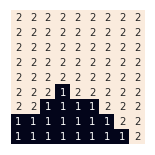

0.28993519966087045 -405.5985794067383


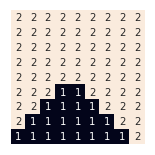

0.2884855236625661 -480.6518325805664


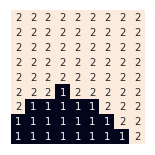

0.28704309604425327 -471.12586212158203


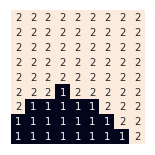

0.285607880564032 -438.5463104248047


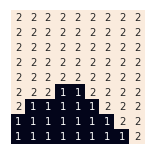

0.28417984116121187 -415.9670867919922


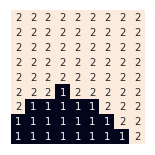

0.2827589419554058 -405.02001190185547


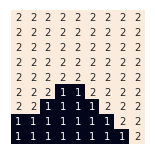

0.28134514724562876 -436.86287689208984


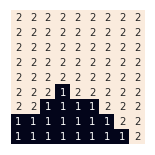

0.2799384215094006 -484.8102798461914


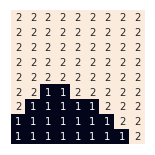

0.27853872940185365 -434.9141616821289


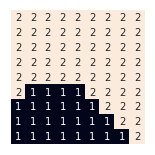

0.27714603575484437 -464.38819122314453


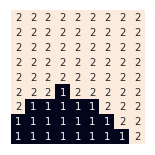

0.2757603055760701 -434.02001190185547


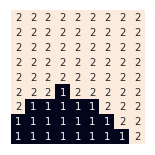

0.2743815040481898 -393.2816848754883


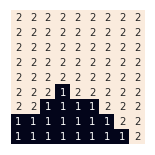

0.2730095965279488 -393.07129669189453


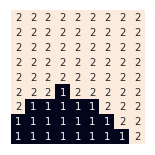

0.27164454854530906 -421.01902770996094


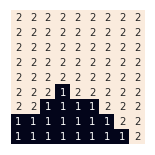

0.2702863258025825 -390.38720703125


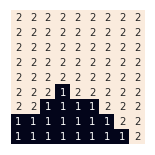

0.2689348941735696 -497.65281677246094


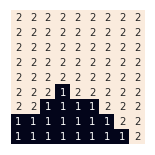

0.26759021970270175 -361.7547302246094


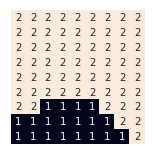

0.2662522686041882 -413.59825134277344


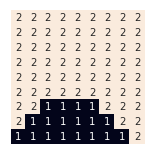

0.2649210072611673 -358.28070068359375


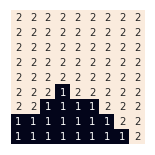

0.26359640222486147 -377.96544647216797


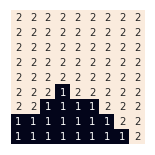

0.26227842021373715 -481.02099609375


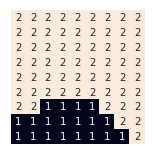

0.2609670281126685 -445.0193557739258


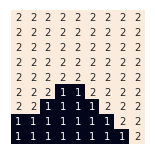

0.25966219297210513 -410.7563705444336


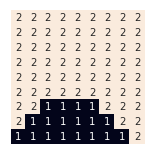

0.2583638820072446 -395.80765533447266


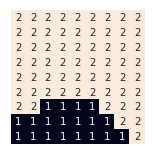

0.2570720625972084 -428.0719528198242


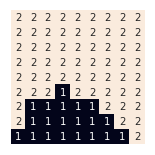

0.25578670228422234 -449.8632049560547


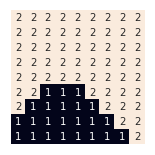

0.25450776877280124 -394.0180435180664


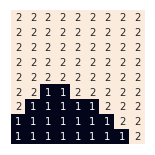

0.2532352299289372 -444.38917541503906


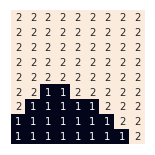

0.2519690537792925 -381.07064056396484


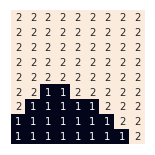

0.2507092085103961 -403.2810287475586


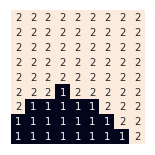

0.2494556624678441 -400.1235656738281


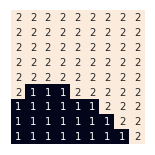

0.24820838415550486 -428.8612365722656


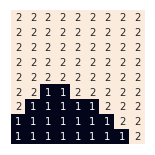

0.24696734223472733 -358.96446228027344


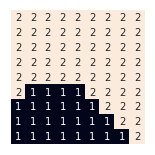

0.2457325055235537 -374.6501922607422


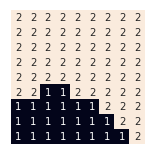

0.24450384299593592 -378.228759765625


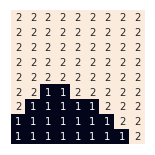

0.24328132378095624 -351.8586120605469


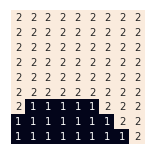

0.24206491716205145 -377.38622283935547


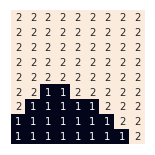

0.2408545925762412 -404.0719528198242


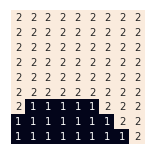

0.23965031961336 -434.49371337890625


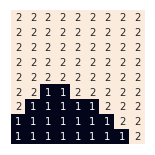

0.2384520680152932 -368.07129669189453


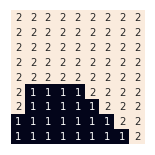

0.23725980767521673 -411.4927291870117


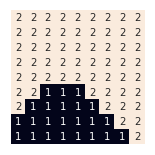

0.23607350863684065 -450.1255340576172


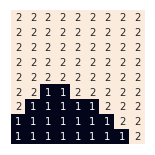

0.23489314109365644 -356.2816848754883


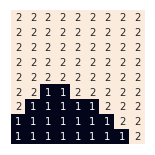

0.23371867538818816 -365.80699920654297


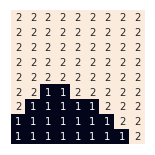

0.23255008201124722 -395.38753509521484


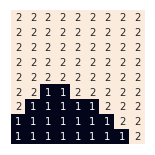

0.231387331601191 -453.2826690673828


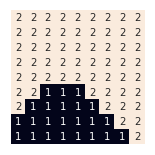

0.23023039494318503 -388.54467010498047


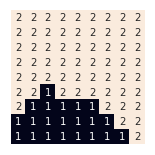

0.2290792429684691 -421.4411163330078


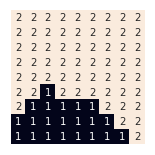

0.22793384675362674 -340.0170593261719


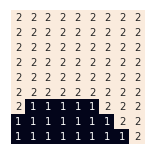

0.22679417751985861 -422.3878631591797


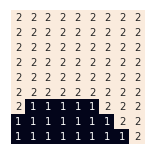

0.22566020663225933 -382.38720703125


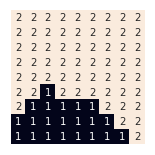

0.22453190559909803 -357.07064056396484


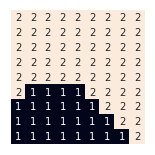

0.22340924607110255 -359.9651184082031


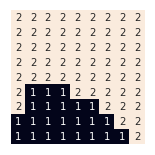

0.22229219984074702 -337.3849105834961


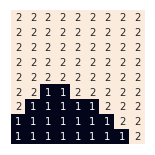

0.2211807388415433 -354.43914794921875


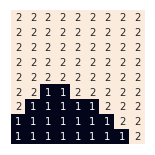

0.22007483514733558 -374.0180435180664


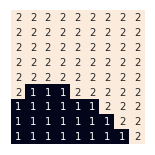

0.2189744609715989 -364.7540740966797


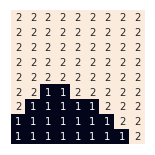

0.2178795886667409 -394.7024612426758


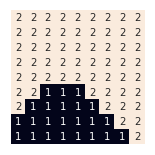

0.2167901907234072 -424.07129669189453


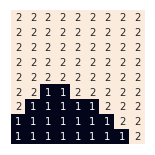

0.21570623976979014 -356.64920806884766


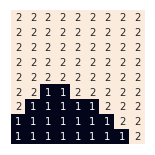

0.21462770857094118 -340.8589401245117


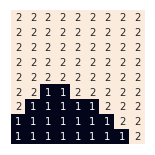

0.21355457002808648 -355.54368591308594


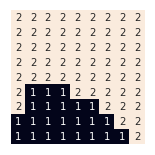

0.21248679717794605 -391.70311737060547


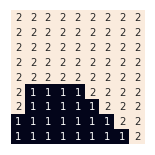

0.21142436319205632 -426.86156463623047


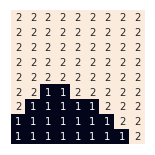

0.21036724137609603 -319.9112091064453


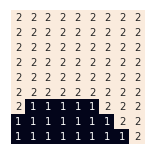

0.20931540516921554 -368.2803726196289


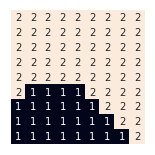

0.20826882814336947 -312.33165740966797


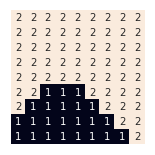

0.20722748400265262 -351.1225814819336


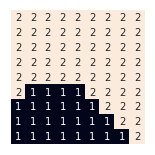

0.20619134658263935 -352.2803726196289


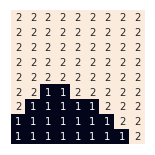

0.20516038984972615 -377.59693908691406


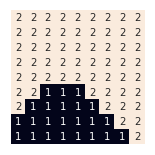

0.2041345879004775 -315.4904327392578


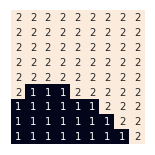

0.2031139149609751 -363.6495361328125


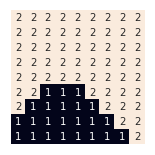

0.20209834538617025 -417.17616271972656


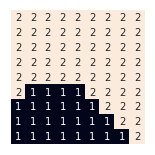

0.2010878536592394 -341.28004455566406


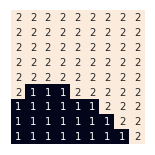

0.2000824143909432 -348.4381637573242


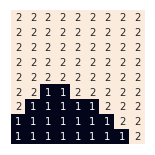

0.19908200231898848 -356.49141693115234


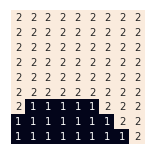

0.19808659230739353 -321.75440216064453


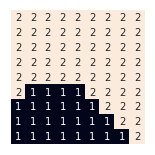

0.19709615934585656 -333.8050308227539


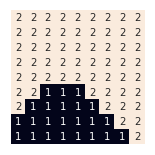

0.19611067854912728 -365.12225341796875


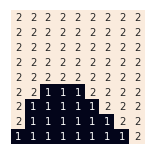

0.19513012515638165 -353.38622283935547


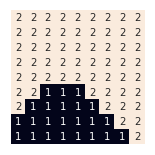

0.19415447453059972 -288.49076080322266


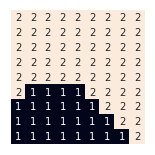

0.19318370215794672 -328.4371795654297


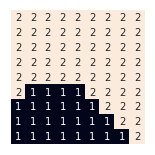

0.192217783647157 -296.1209411621094


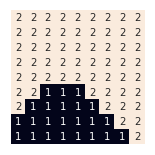

0.1912566947289212 -385.01837158203125


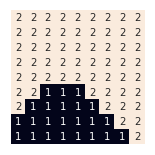

0.1903004112552766 -294.594970703125


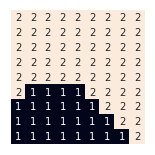

0.18934890919900021 -326.80601501464844


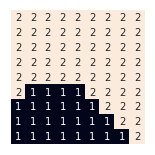

0.18840216465300522 -354.1225814819336


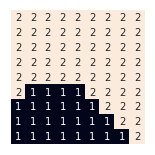

0.18746015382974018 -358.4381637573242


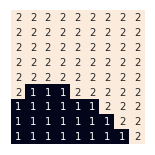

0.1865228530605915 -286.2258071899414


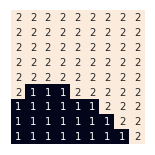

0.18559023879528855 -349.4378356933594


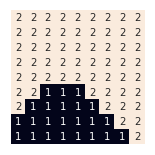

0.1846622876013121 -327.01607513427734


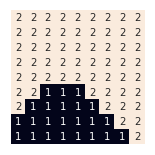

0.18373897616330553 -267.0680160522461


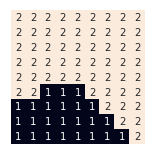

0.182820281282489 -337.70082092285156


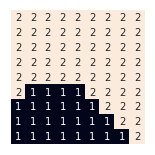

0.18190617987607657 -296.80601501464844


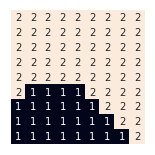

0.18099664897669618 -313.9641342163086


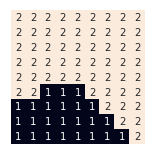

0.1800916657318127 -310.75374603271484


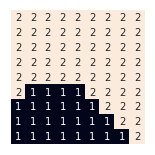

0.17919120740315364 -317.06932830810547


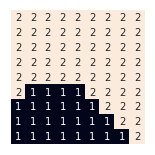

0.17829525136613786 -334.0686721801758


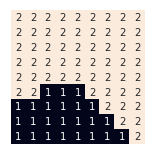

0.17740377510930716 -358.01673126220703


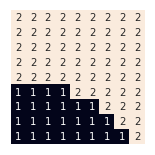

0.17651675623376062 -315.0157470703125


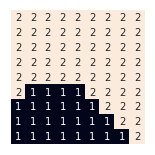

0.1756341724525918 -303.96446228027344


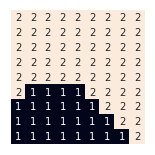

0.17475600159032884 -243.69983673095703


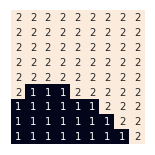

0.17388222158237718 -319.75308990478516


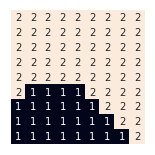

0.1730128104744653 -396.3855667114258


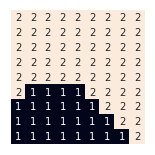

0.17214774642209296 -368.75374603271484


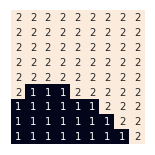

0.1712870076899825 -352.54368591308594


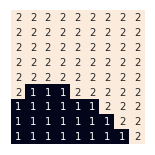

0.17043057265153258 -346.75341796875


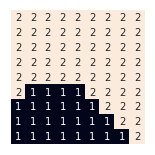

0.16957841978827493 -259.22613525390625


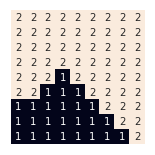

0.16873052768933355 -280.9105529785156


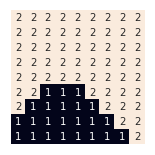

0.1678868750508869 -340.2787322998047


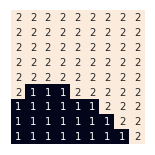

0.16704744067563246 -314.5427017211914


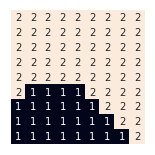

0.1662122034722543 -303.96446228027344


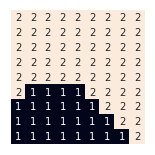

0.16538114245489302 -316.4897766113281


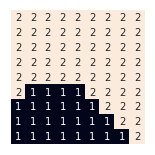

0.16455423674261854 -340.80601501464844


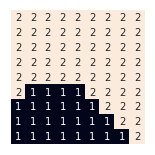

0.16373146555890544 -303.75308990478516


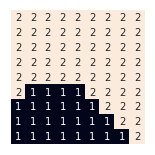

0.16291280823111093 -326.69918060302734


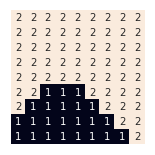

0.16209824418995536 -328.0690002441406


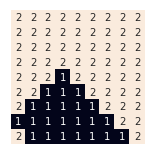

0.16128775296900558 -280.9634780883789


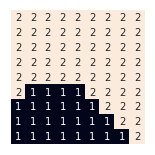

0.16048131420416054 -315.5420455932617


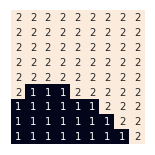

0.15967890763313974 -280.1212692260742


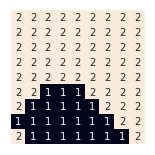

0.15888051309497406 -277.54138946533203


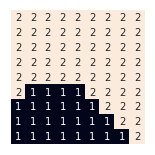

0.1580861105294992 -278.9624938964844


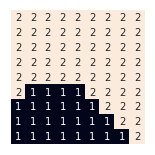

0.1572956799768517 -249.90989685058594


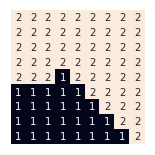

0.15650920157696743 -374.01771545410156


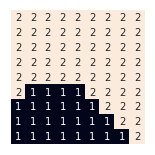

0.1557266555690826 -242.01476287841797


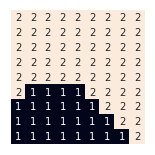

0.1549480222912372 -260.7517776489258


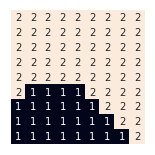

0.15417328217978102 -306.22679138183594


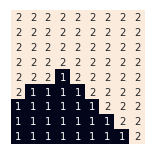

0.1534024157688821 -304.594970703125


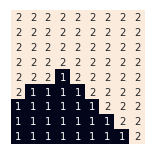

0.1526354036900377 -204.64527130126953


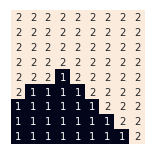

0.1518722266715875 -289.96315002441406


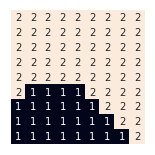

0.15111286553822956 -335.0157470703125


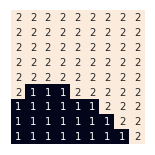

0.15035730121053842 -272.2258071899414


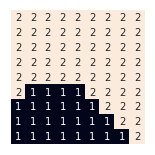

0.14960551470448571 -361.80601501464844


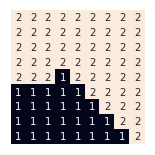

0.14885748713096328 -259.64691162109375


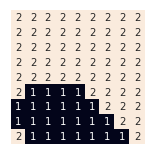

0.14811319969530845 -296.9624938964844


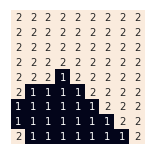

0.1473726336968319 -323.4894485473633


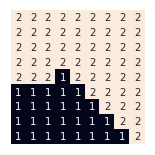

0.14663577052834775 -321.54237365722656


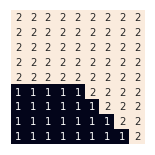

0.14590259167570602 -296.01541900634766


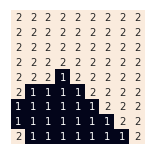

0.1451730787173275 -276.9628219604492


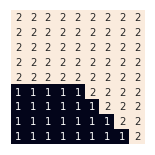

0.14444721332374086 -242.90924072265625


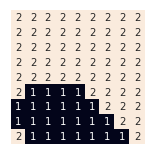

0.14372497725712216 -269.5956268310547


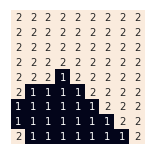

0.14300635237083656 -298.80601501464844


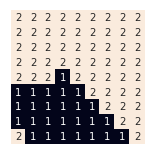

0.14229132060898236 -227.59333038330078


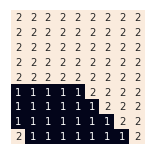

0.14157986400593744 -222.54073333740234


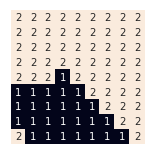

0.14087196468590776 -288.17386627197266


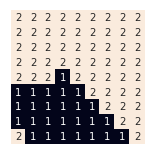

0.14016760486247823 -349.2793884277344


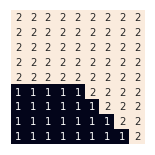

0.13946676683816583 -268.85762786865234


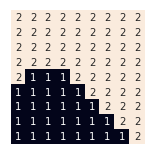

0.138769433003975 -303.96380615234375


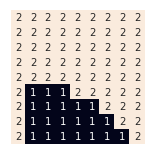

0.13807558583895513 -223.59398651123047


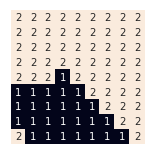

0.13738520790976036 -248.6472396850586


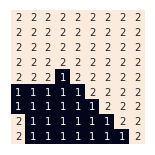

0.13669828187021155 -279.43685150146484


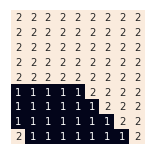

0.13601479046086049 -321.2793884277344


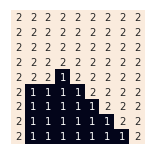

0.1353347165085562 -336.38523864746094


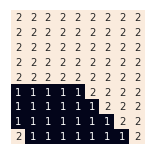

0.1346580429260134 -266.0157470703125


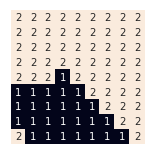

0.13398475271138335 -241.6465835571289


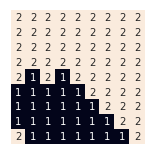

0.13331482894782642 -253.90924072265625


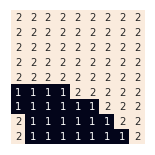

0.13264825480308728 -266.11995697021484


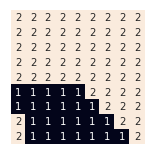

0.13198501352907185 -292.0157470703125


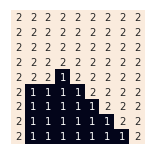

0.1313250884614265 -267.33067321777344


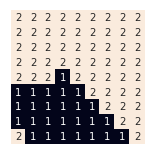

0.13066846301911936 -295.3835983276367


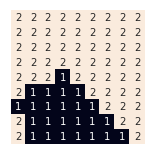

0.13001512070402377 -282.4358673095703


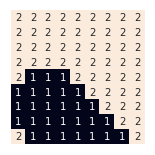

0.12936504510050365 -281.85631561279297


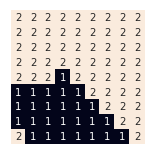

0.12871821987500112 -301.0680160522461


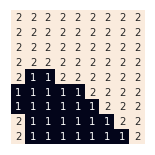

0.12807462877562611 -280.0144348144531


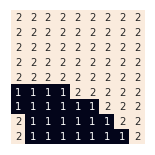

0.12743425563174798 -265.85631561279297


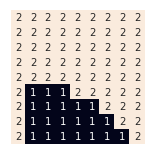

0.12679708435358925 -318.69983673095703


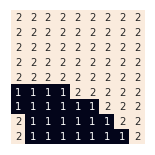

0.1261630989318213 -271.2248229980469


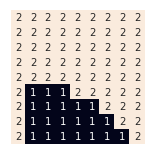

0.1255322834371622 -267.33067321777344


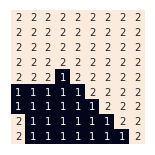

0.12490462201997637 -187.59333038330078


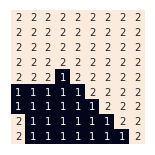

0.1242800989098765 -180.90825653076172


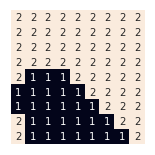

0.12365869841532712 -219.01410675048828


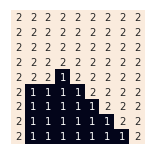

0.12304040492325048 -338.85828399658203


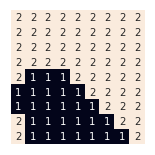

0.12242520289863423 -203.69852447509766


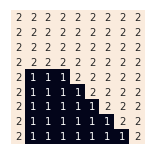

0.12181307688414106 -209.80240631103516


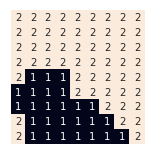

0.12120401149972035 -289.5420455932617


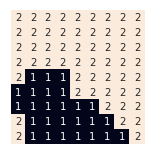

0.12059799144222175 -250.85697174072266


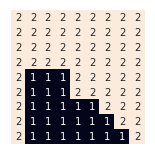

0.11999500148501063 -238.38294219970703


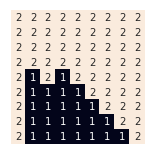

0.11939502647758558 -238.75144958496094


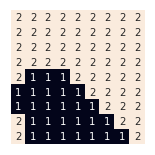

0.11879805134519765 -241.75144958496094


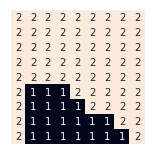

0.11820406108847166 -257.0141067504883


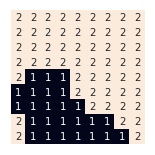

0.1176130407830293 -300.22679138183594


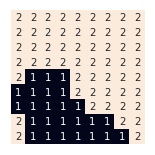

0.11702497557911415 -238.3826141357422


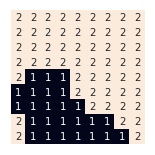

0.11643985070121858 -227.9618377685547


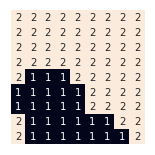

0.11585765144771248 -255.11995697021484


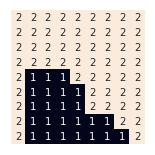

0.11527836319047392 -268.69983673095703


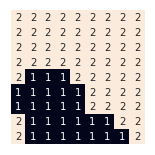

0.11470197137452155 -241.22482299804688


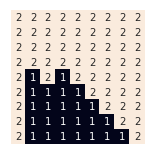

0.11412846151764894 -197.3819580078125


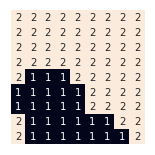

0.1135578192100607 -246.17255401611328


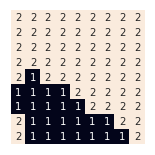

0.11299003011401039 -261.96150970458984


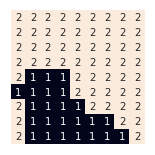

0.11242507996344034 -226.54171752929688


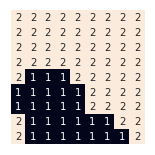

0.11186295456362313 -215.1712417602539


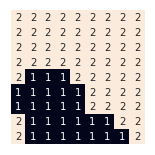

0.11130363979080501 -272.9624938964844


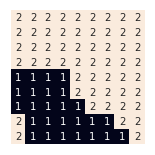

0.11074712159185099 -240.27840423583984


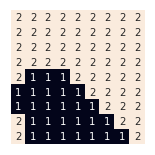

0.11019338598389174 -230.33100128173828


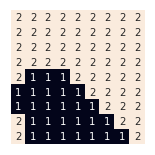

0.10964241905397228 -262.01541900634766


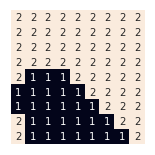

0.10909420695870241 -250.1718978881836


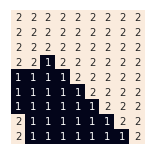

0.1085487359239089 -192.85533142089844


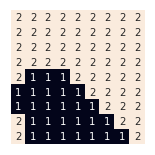

0.10800599224428936 -210.85598754882812


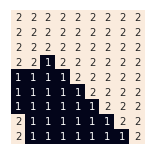

0.10746596228306791 -194.22482299804688


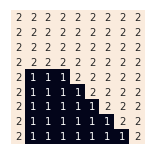

0.10692863247165257 -248.2774200439453


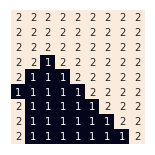

0.1063939893092943 -289.8572998046875


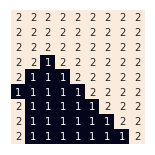

0.10586201936274783 -274.96315002441406


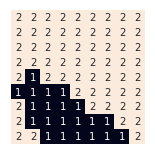

0.10533270926593409 -243.75079345703125


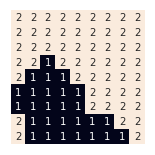

0.10480604571960442 -192.3296890258789


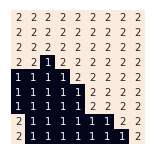

0.1042820154910064 -219.80371856689453


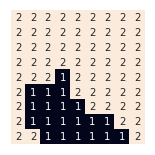

0.10376060541355137 -251.69918060302734


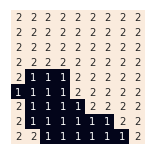

0.1032418023864836 -253.9089126586914


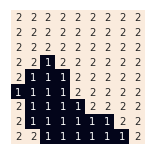

0.10272559337455119 -243.9095687866211


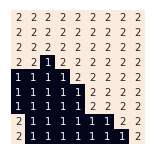

0.10221196540767843 -186.17156982421875


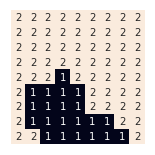

0.10170090558064004 -290.43619537353516


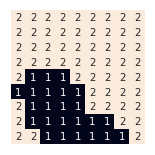

0.10119240105273684 -223.4881362915039


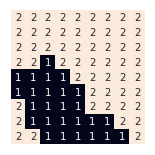

0.10068643904747315 -211.22449493408203


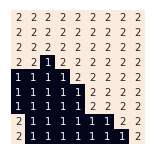

0.10018300685223579 -212.27709197998047


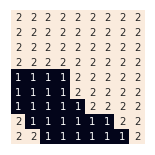

0.1 -201.64527130126953


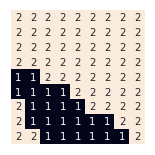

0.1 -244.11995697021484


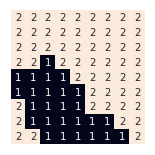

0.1 -245.6981964111328


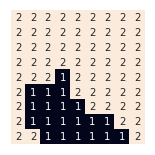

0.1 -205.64559936523438


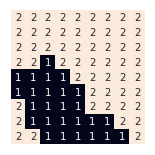

0.1 -248.5926742553711


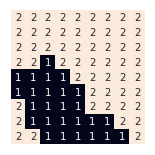

0.1 -272.01476287841797


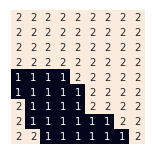

0.1 -265.75144958496094


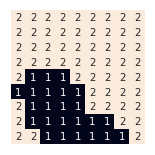

0.1 -205.3826141357422


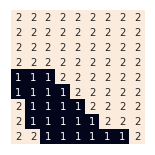

0.1 -239.48780822753906


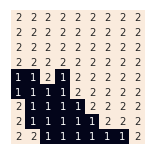

0.1 -206.59234619140625


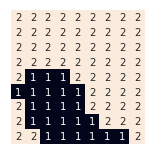

0.1 -227.75144958496094


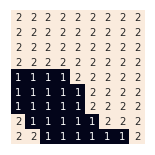

0.1 -262.2258071899414


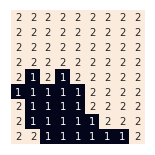

0.1 -298.59464263916016


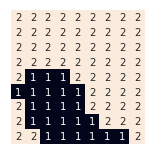

0.1 -225.9089126586914


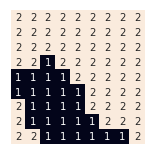

0.1 -235.6465835571289


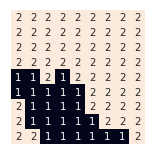

0.1 -202.2241668701172


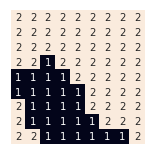

0.1 -223.8566436767578


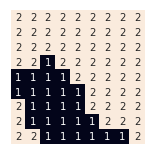

0.1 -259.7517776489258


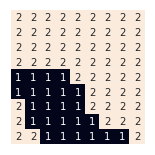

0.1 -271.0673599243164


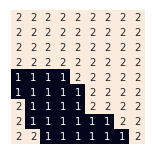

0.1 -237.5404052734375


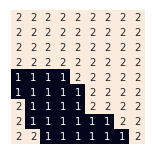

0.1 -228.33001708984375


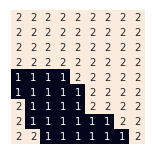

0.1 -240.80371856689453


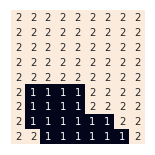

0.1 -215.9618377685547


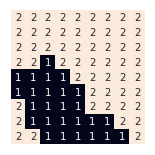

0.1 -227.22482299804688


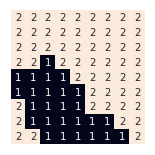

0.1 -271.54138946533203


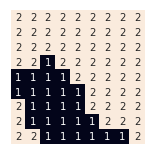

0.1 -275.6472396850586


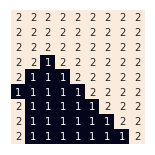

0.1 -238.8033905029297


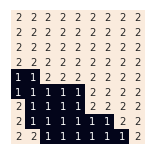

0.1 -228.33067321777344


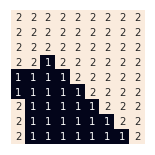

0.1 -206.96150970458984


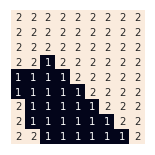

0.1 -287.0164031982422


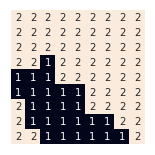

0.1 -257.7521057128906


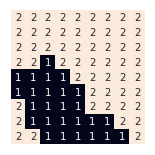

0.1 -198.80240631103516


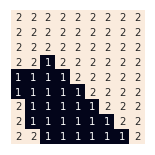

0.1 -210.85565948486328


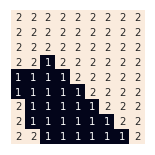

0.1 -211.32936096191406


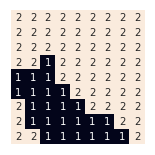

0.1 -264.6988525390625


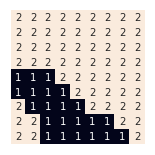

0.1 -192.90792846679688


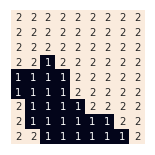

0.1 -292.9618377685547


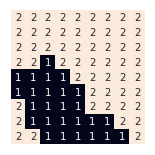

0.1 -246.43521118164062


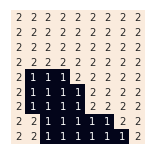

0.1 -208.3826141357422


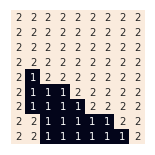

0.1 -224.6988525390625


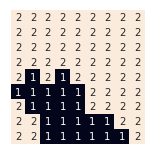

0.1 -195.27676391601562


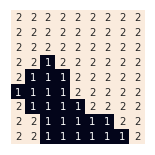

0.1 -274.22449493408203


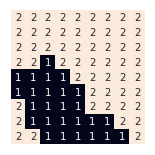

0.1 -208.85598754882812


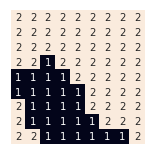

0.1 -200.27676391601562


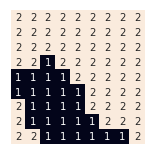

0.1 -214.43521118164062


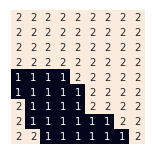

0.1 -275.54073333740234


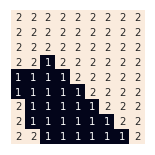

0.1 -209.6988525390625


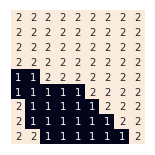

0.1 -197.17222595214844


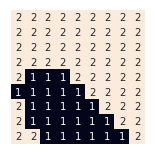

0.1 -239.8033905029297


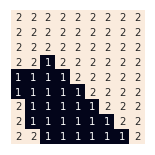

0.1 -248.01443481445312


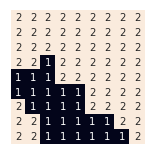

0.1 -238.3826141357422


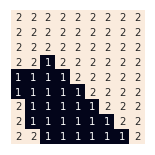

0.1 -151.80306243896484


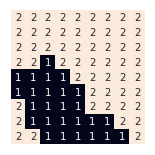

0.1 -259.4358673095703


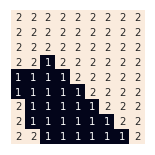

0.1 -203.5404052734375


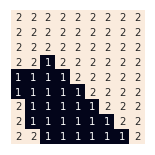

0.1 -221.38359832763672


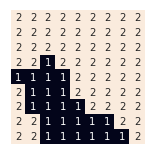

0.1 -236.22449493408203


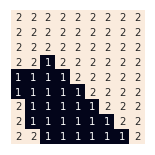

0.1 -278.54073333740234


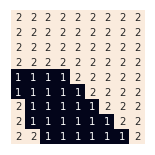

0.1 -265.69918060302734


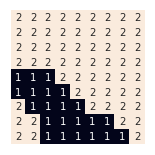

0.1 -261.96216583251953


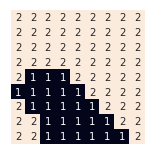

0.1 -243.11962890625


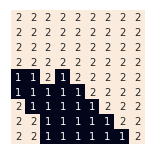

0.1 -235.75210571289062


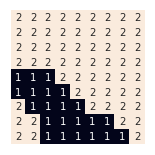

0.1 -230.69918060302734


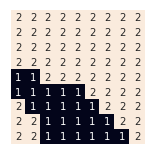

0.1 -234.59333038330078


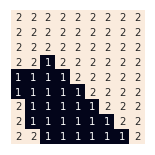

0.1 -235.7511215209961


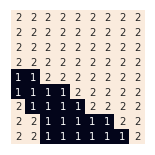

0.1 -272.27709197998047


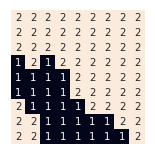

0.1 -244.3826141357422


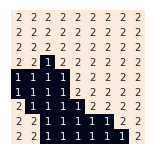

0.1 -218.85598754882812


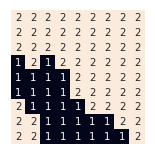

0.1 -231.43488311767578


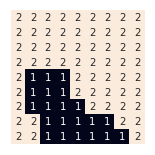

0.1 -157.7504653930664


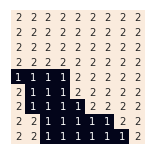

0.1 -232.22482299804688


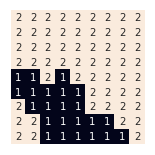

0.1 -302.75144958496094


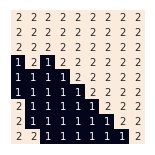

0.1 -229.06670379638672


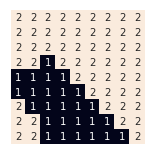

0.1 -261.85762786865234


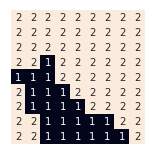

0.1 -238.1189727783203


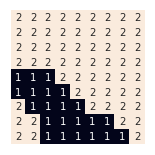

0.1 -217.64527130126953


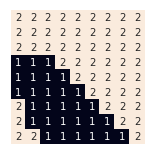

0.1 -237.69852447509766


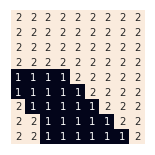

0.1 -294.6465835571289


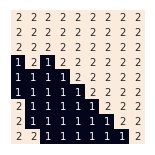

0.1 -250.5404052734375


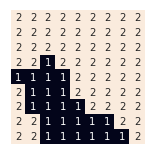

0.1 -239.48846435546875


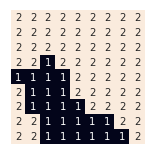

0.1 -245.54138946533203


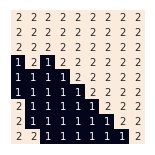

0.1 -240.85598754882812


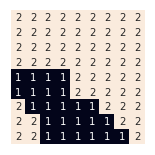

0.1 -267.85697174072266


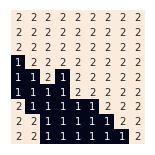

0.1 -215.64527130126953


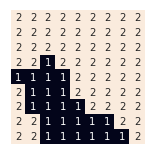

0.1 -252.69852447509766


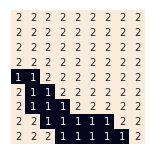

0.1 -201.32936096191406


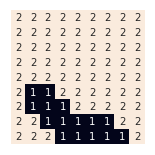

0.1 -190.53909301757812


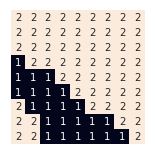

0.1 -236.54007720947266


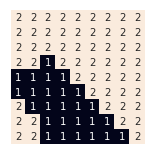

0.1 -260.5936584472656


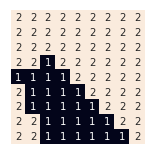

0.1 -250.0150909423828


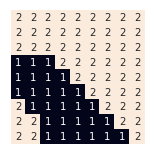

0.1 -210.75177764892578


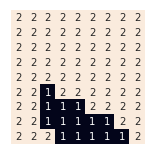

0.1 -270.9095687866211


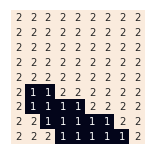

0.1 -240.27643585205078


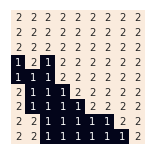

0.1 -201.75013732910156


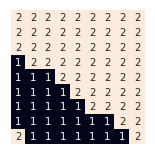

0.1 -281.7521057128906


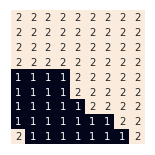

0.1 -269.5404052734375


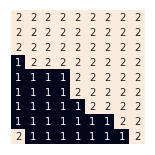

0.1 -261.6455993652344


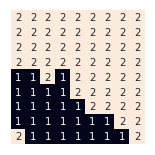

0.1 -185.48748016357422


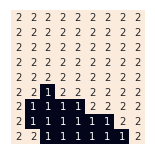

0.1 -254.8566436767578


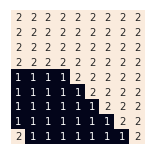

0.1 -270.6455993652344


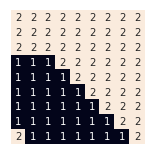

0.1 -241.43521118164062


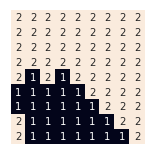

0.1 -198.59333038330078


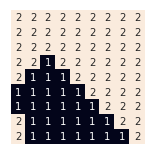

0.1 -250.43553924560547


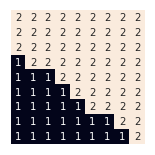

0.1 -160.43488311767578


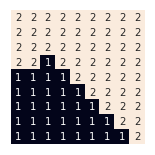

0.1 -227.0157470703125


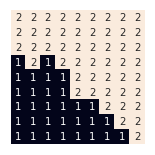

0.1 -210.6988525390625


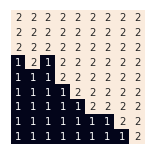

0.1 -215.48780822753906


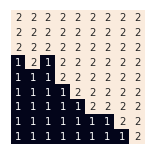

0.1 -233.01377868652344


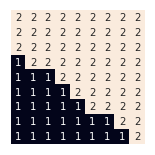

0.1 -279.8572998046875


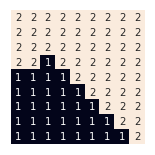

0.1 -244.43521118164062


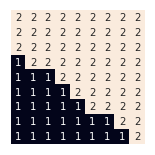

0.1 -296.9624938964844


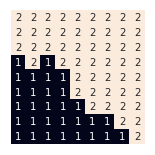

0.1 -269.9089126586914


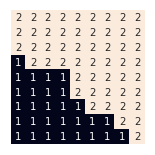

0.1 -215.48780822753906


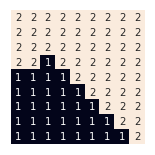

0.1 -234.11864471435547


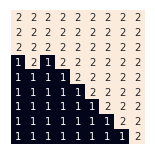

0.1 -271.0673599243164


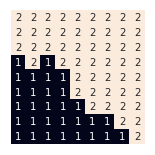

0.1 -266.64625549316406


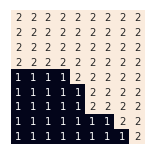

0.1 -258.2774200439453


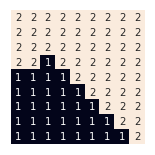

0.1 -229.59365844726562


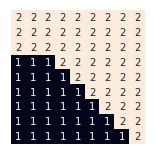

0.1 -188.2774200439453


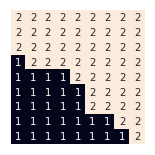

0.1 -226.43488311767578


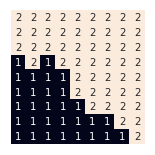

0.1 -236.1189727783203


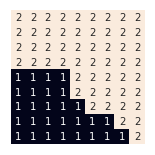

0.1 -219.90858459472656


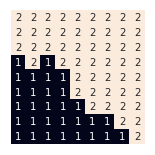

0.1 -223.6988525390625


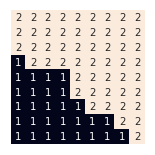

0.1 -233.33001708984375


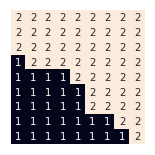

0.1 -212.59333038330078


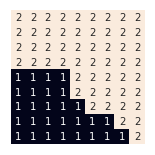

0.1 -286.11995697021484


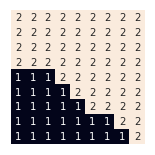

0.1 -181.38162994384766


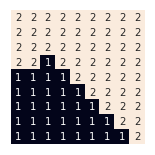

0.1 -228.06703186035156


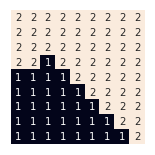

0.1 -249.17156982421875


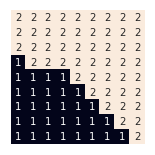

0.1 -221.27709197998047


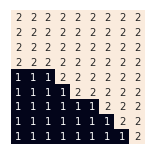

0.1 -242.22515106201172


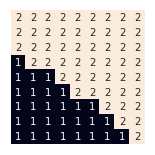

0.1 -264.1202850341797


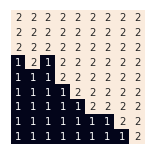

0.1 -203.3826141357422


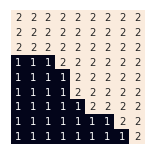

0.1 -245.85598754882812


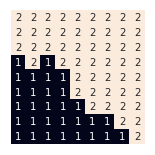

0.1 -274.8572998046875


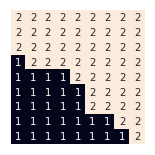

0.1 -262.8033905029297


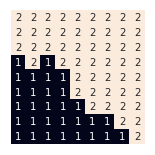

0.1 -221.33001708984375


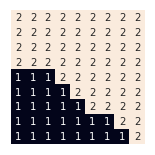

0.1 -239.69754028320312


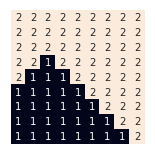

0.1 -251.90924072265625


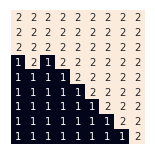

0.1 -317.5417175292969


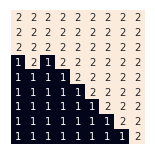

0.1 -276.38228607177734


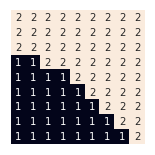

0.1 -221.4358673095703


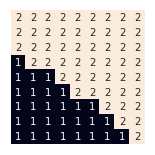

0.1 -268.85697174072266


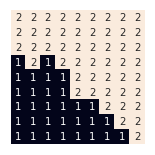

0.1 -251.17288208007812


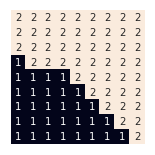

0.1 -245.6465835571289


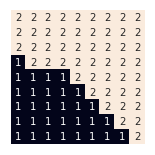

0.1 -189.43455505371094


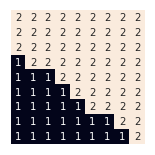

0.1 -300.3832702636719


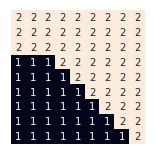

0.1 -241.43521118164062


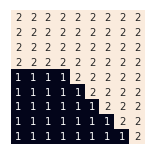

0.1 -223.69852447509766


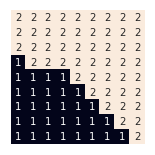

0.1 -171.5404052734375


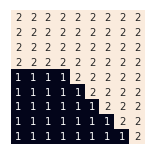

0.1 -177.27676391601562


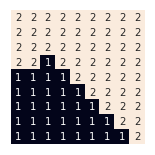

0.1 -223.64592742919922


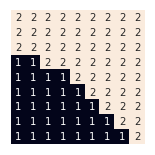

0.1 -215.90924072265625


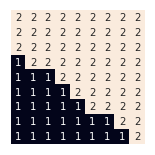

0.1 -216.33001708984375


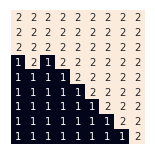

0.1 -244.85631561279297


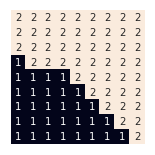

0.1 -174.2241668701172


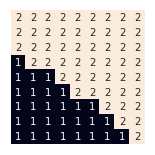

0.1 -221.01443481445312


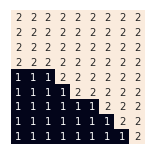

0.1 -221.33067321777344


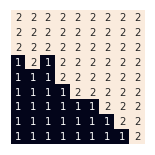

0.1 -217.85598754882812


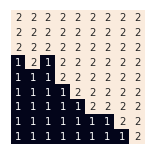

0.1 -177.64527130126953


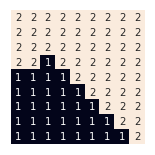

0.1 -204.01377868652344


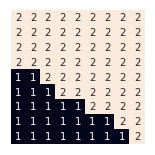

0.1 -263.7521057128906


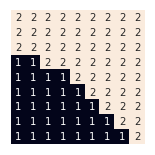

0.1 -229.6988525390625


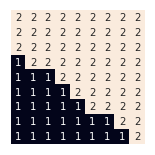

0.1 -266.54138946533203


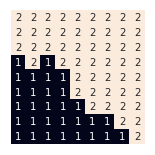

0.1 -190.06637573242188


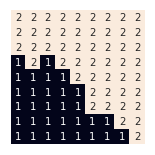

0.1 -288.5404052734375


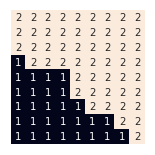

0.1 -249.5410614013672


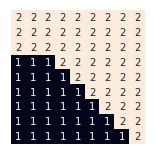

0.1 -218.6981964111328


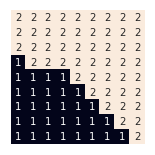

0.1 -240.22515106201172


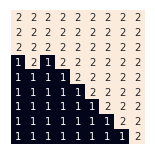

0.1 -225.7511215209961


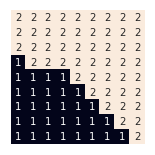

0.1 -250.64559936523438


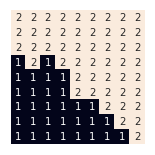

0.1 -193.54007720947266


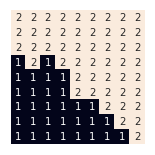

0.1 -252.48846435546875


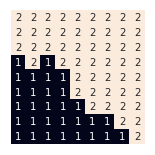

0.1 -249.7511215209961


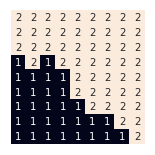

0.1 -200.59300231933594


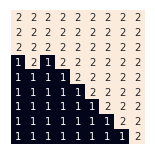

0.1 -175.75079345703125


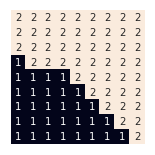

0.1 -298.6465835571289


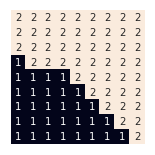

0.1 -226.06604766845703


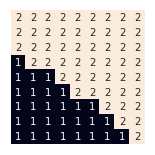

0.1 -209.2241668701172


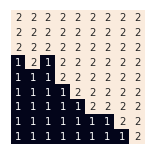

0.1 -243.278076171875


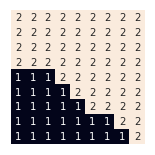

0.1 -261.8040466308594


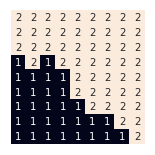

0.1 -263.90989685058594


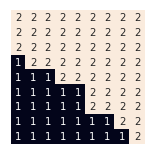

0.1 -215.01377868652344


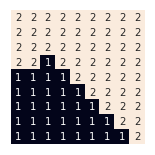

0.1 -233.80437469482422


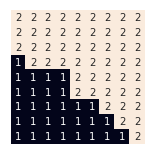

0.1 -296.85762786865234


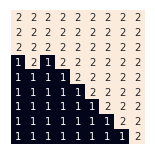

0.1 -218.80306243896484


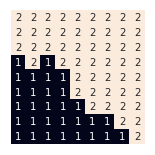

0.1 -257.8043746948242


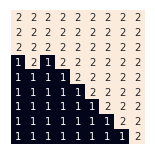

0.1 -215.96216583251953


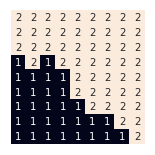

0.1 -291.8572998046875


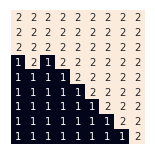

0.1 -173.80306243896484


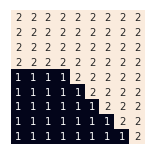

0.1 -162.802734375


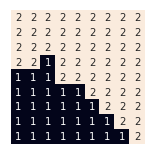

0.1 -286.278076171875


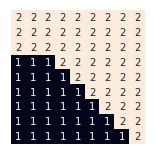

0.1 -256.1202850341797


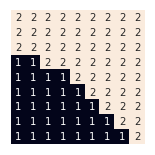

0.1 -219.75079345703125


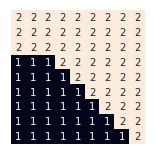

0.1 -192.59365844726562


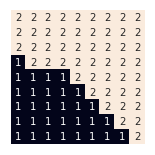

0.1 -265.5936584472656


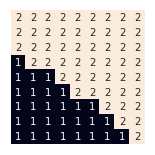

0.1 -181.9095687866211


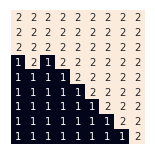

0.1 -219.80437469482422


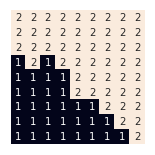

0.1 -240.5404052734375


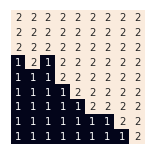

0.1 -248.54138946533203


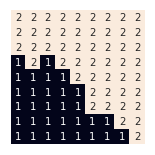

0.1 -260.38458251953125


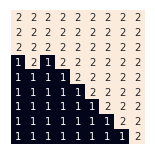

0.1 -248.80371856689453


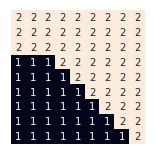

0.1 -249.96216583251953


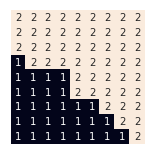

0.1 -210.43521118164062


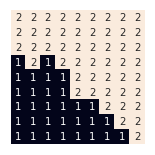

0.1 -289.0673599243164


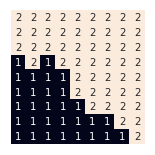

0.1 -207.8566436767578


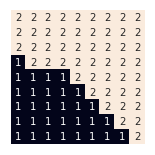

0.1 -226.90924072265625


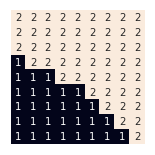

0.1 -192.01377868652344


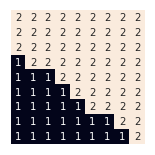

0.1 -212.85631561279297


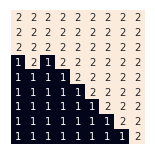

0.1 -222.59333038330078


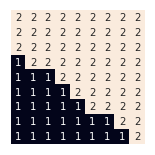

0.1 -226.80306243896484


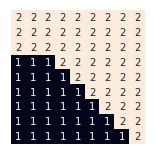

0.1 -210.9089126586914


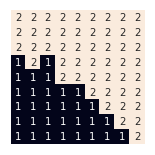

0.1 -230.17156982421875


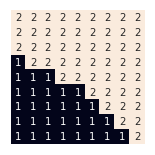

0.1 -257.54073333740234


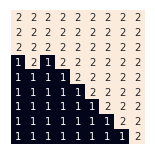

0.1 -217.5926742553711


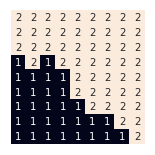

0.1 -258.64625549316406


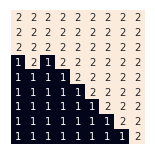

0.1 -239.69786834716797


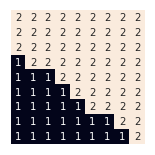

0.1 -240.11962890625


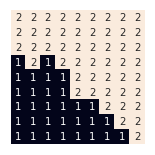

0.1 -239.69852447509766


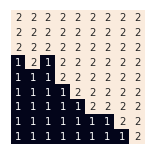

0.1 -193.22482299804688


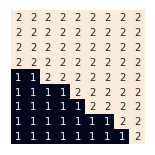

0.1 -250.64527130126953


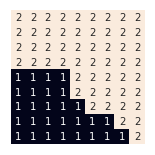

0.1 -279.3310012817383


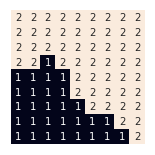

0.1 -247.80404663085938


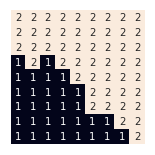

0.1 -333.1748504638672


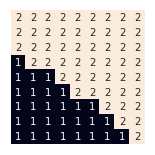

0.1 -242.5410614013672


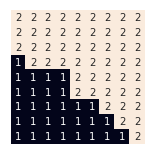

0.1 -302.2264633178711


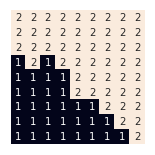

0.1 -295.4365234375


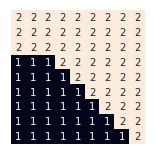

0.1 -237.22482299804688


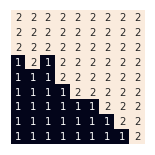

0.1 -151.64527130126953


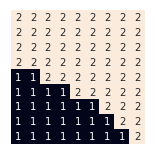

0.1 -287.48846435546875


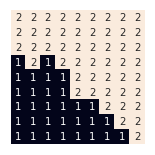

0.1 -291.3303451538086


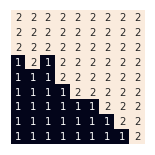

0.1 -195.43488311767578


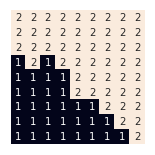

0.1 -228.48780822753906


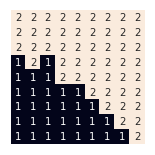

0.1 -253.22449493408203


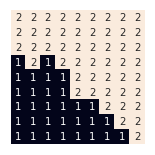

0.1 -174.90792846679688


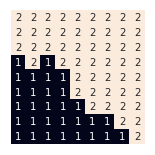

0.1 -235.01377868652344


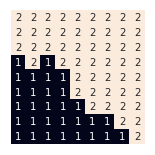

0.1 -231.06768798828125


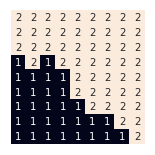

0.1 -222.06768798828125


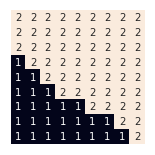

0.1 -253.06834411621094


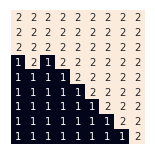

0.1 -188.59365844726562


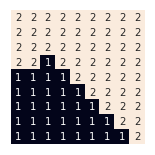

0.1 -256.278076171875


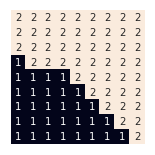

0.1 -264.3310012817383


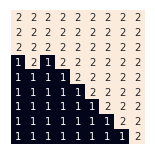

0.1 -187.6449432373047


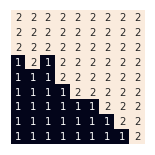

0.1 -235.54073333740234


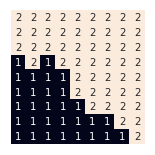

0.1 -272.27840423583984


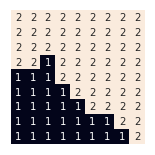

0.1 -260.6988525390625


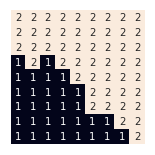

0.1 -240.75177764892578


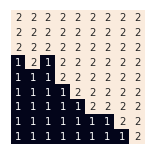

0.1 -266.80535888671875


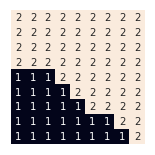

0.1 -213.8033905029297


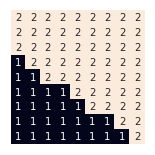

0.1 -258.0141067504883


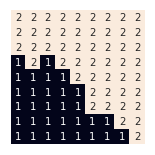

0.1 -240.01476287841797


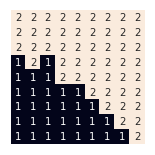

0.1 -218.96249389648438


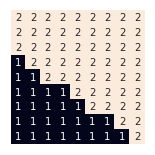

0.1 -221.96150970458984


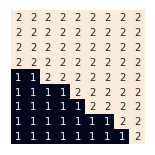

0.1 -235.17222595214844


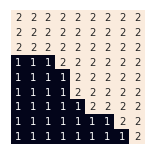

0.1 -228.54073333740234


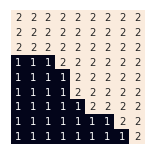

0.1 -223.43521118164062


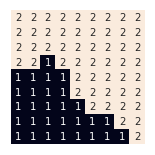

0.1 -260.17321014404297


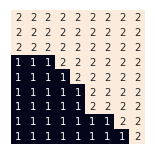

0.1 -228.38228607177734


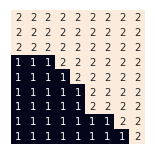

0.1 -214.17156982421875


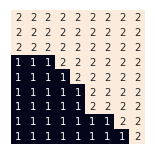

0.1 -256.5936584472656


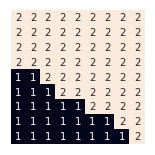

0.1 -223.6981964111328


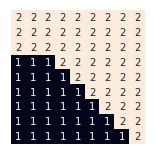

0.1 -278.6995086669922


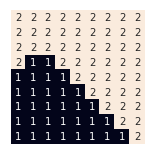

0.1 -215.8579559326172


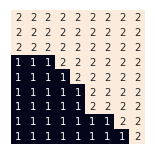

0.1 -229.59365844726562


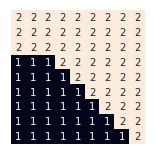

0.1 -197.1718978881836


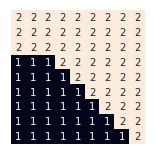

0.1 -256.9624938964844


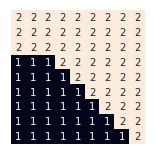

0.1 -197.75079345703125


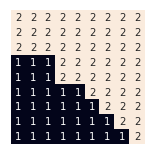

0.1 -235.90924072265625


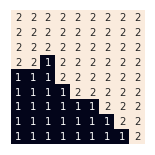

0.1 -262.75144958496094


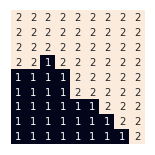

0.1 -240.17255401611328


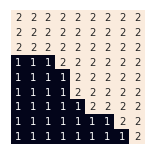

0.1 -245.64592742919922


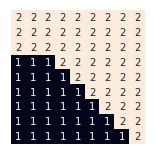

0.1 -230.75144958496094


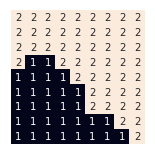

0.1 -234.69852447509766


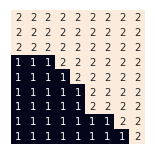

0.1 -264.5410614013672


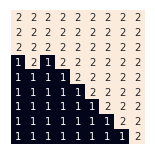

0.1 -224.80371856689453


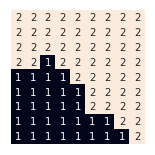

0.1 -165.64527130126953


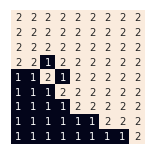

0.1 -271.5420455932617


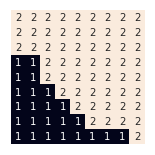

0.1 -215.9618377685547


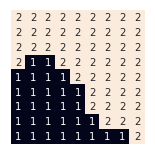

0.1 -202.01410675048828


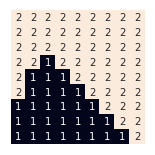

0.1 -297.01476287841797


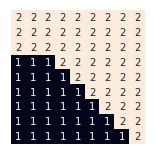

0.1 -208.3842544555664


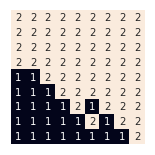

0.1 -318.5427017211914


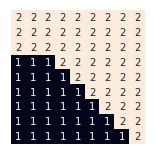

0.1 -234.11962890625


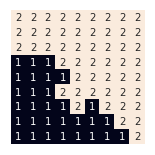

0.1 -250.48715209960938


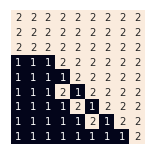

0.1 -221.11930084228516


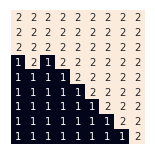

0.1 -271.90989685058594


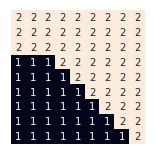

0.1 -241.3296890258789


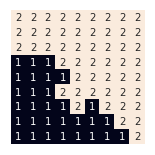

0.1 -256.2258071899414


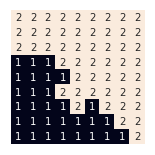

0.1 -243.5943145751953


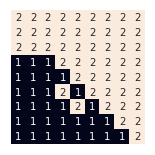

0.1 -192.90858459472656


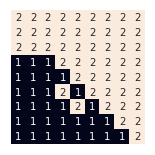

0.1 -229.75177764892578


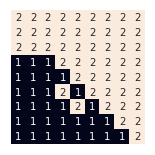

0.1 -223.38294219970703


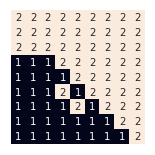

0.1 -195.5410614013672


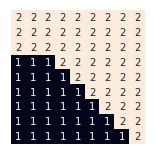

0.1 -264.64691162109375


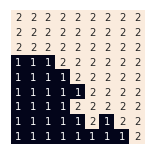

0.1 -260.3303451538086


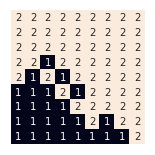

0.1 -226.75079345703125


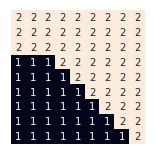

0.1 -274.80535888671875


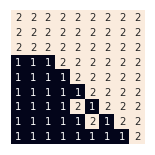

0.1 -250.278076171875


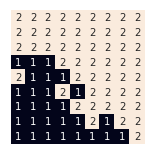

0.1 -212.64559936523438


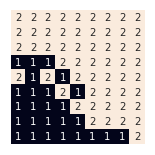

0.1 -234.3303451538086


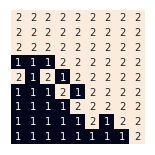

0.1 -200.96216583251953


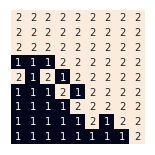

0.1 -252.17156982421875


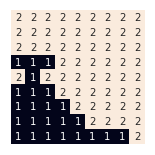

0.1 -170.9618377685547


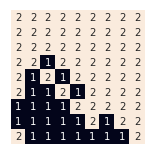

0.1 -177.80306243896484


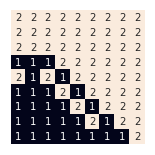

0.1 -268.6988525390625


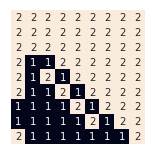

0.1 -214.22449493408203


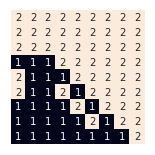

0.1 -240.54073333740234


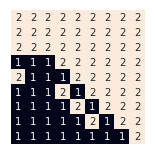

0.1 -218.59333038330078


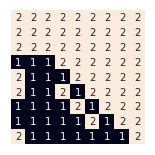

0.1 -228.80404663085938


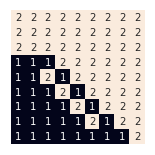

0.1 -211.27676391601562


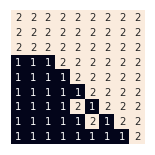

0.1 -178.32936096191406


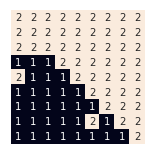

0.1 -211.7511215209961


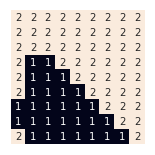

0.1 -250.48846435546875


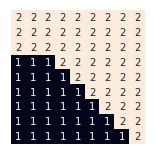

0.1 -219.22482299804688


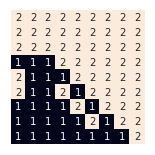

0.1 -160.3819580078125


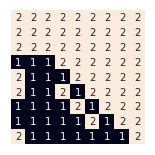

0.1 -220.5397491455078


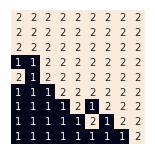

0.1 -244.01410675048828


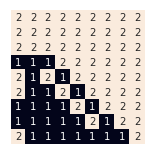

0.1 -191.48748016357422


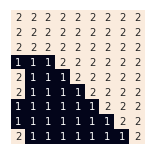

0.1 -266.01476287841797


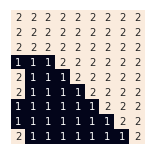

0.1 -264.5933303833008


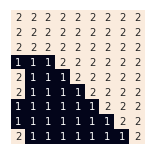

0.1 -228.96216583251953


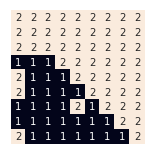

0.1 -230.3826141357422


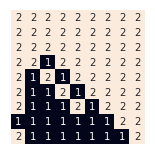

0.1 -233.75079345703125


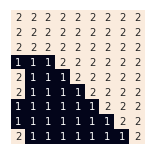

0.1 -247.48748016357422


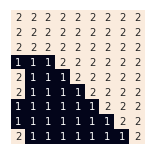

0.1 -206.75144958496094


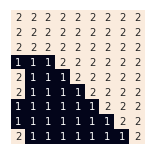

0.1 -270.33001708984375


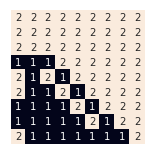

0.1 -204.7511215209961


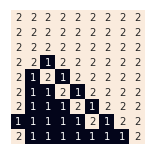

0.1 -221.38294219970703


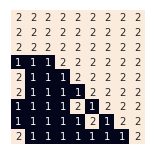

0.1 -187.27774810791016


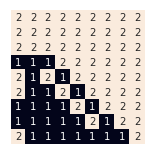

0.1 -230.01443481445312


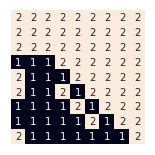

0.1 -276.8566436767578


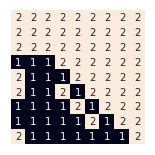

0.1 -256.48846435546875


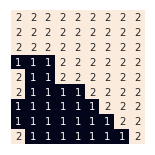

0.1 -234.4358673095703


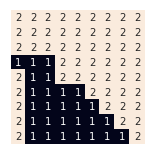

0.1 -219.96150970458984


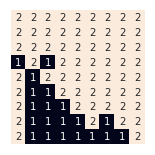

0.1 -211.80306243896484


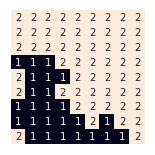

0.1 -261.54073333740234


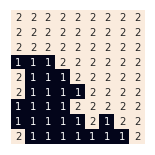

0.1 -247.69918060302734


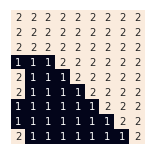

0.1 -224.2241668701172


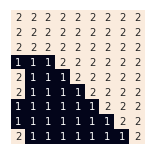

0.1 -214.64559936523438


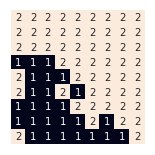

0.1 -187.33100128173828


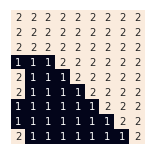

0.1 -284.48846435546875


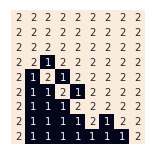

0.1 -179.3819580078125


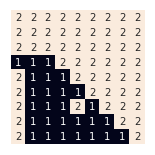

0.1 -201.6981964111328


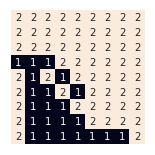

0.1 -173.75079345703125


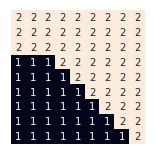

0.1 -258.17222595214844


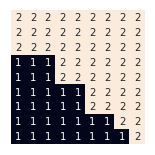

0.1 -257.59464263916016


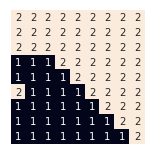

0.1 -206.5404052734375


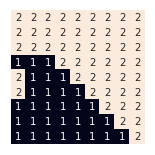

0.1 -255.80371856689453


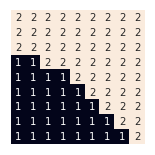

0.1 -152.01377868652344


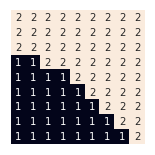

0.1 -224.75177764892578


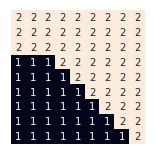

0.1 -207.43521118164062


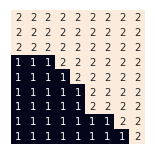

0.1 -264.9618377685547


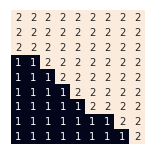

0.1 -256.9095687866211


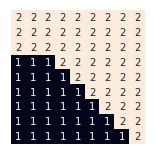

0.1 -206.0673599243164


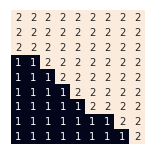

0.1 -264.75243377685547


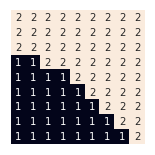

0.1 -210.6449432373047


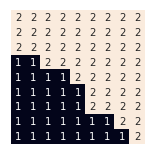

0.1 -167.17222595214844


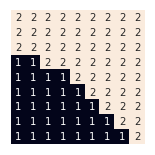

0.1 -231.9089126586914


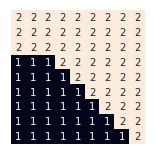

0.1 -302.1209411621094


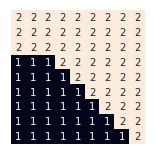

0.1 -285.64691162109375


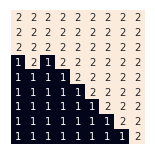

0.1 -248.38327026367188


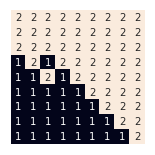

0.1 -251.8050308227539


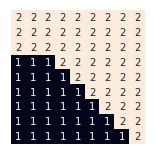

0.1 -230.27709197998047


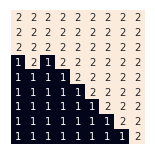

0.1 -249.594970703125


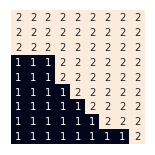

0.1 -201.3296890258789


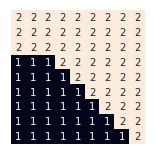

0.1 -245.9634780883789


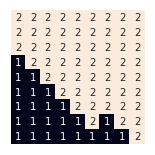

0.1 -241.38294219970703


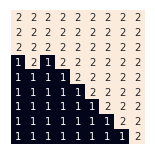

0.1 -200.1712417602539


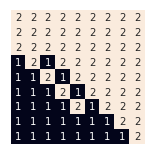

0.1 -245.75177764892578


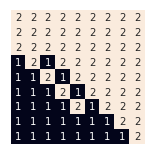

0.1 -238.38294219970703


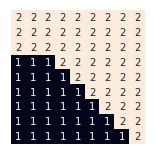

0.1 -251.90924072265625


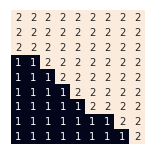

0.1 -231.80371856689453


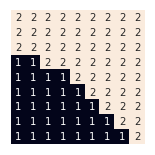

0.1 -268.4358673095703


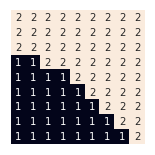

0.1 -236.0157470703125


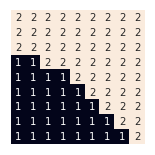

0.1 -232.90858459472656


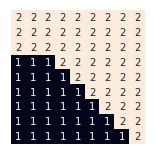

0.1 -287.96380615234375


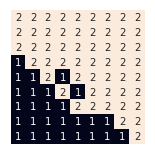

0.1 -255.6981964111328


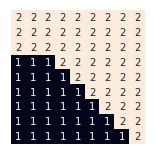

0.1 -250.6988525390625


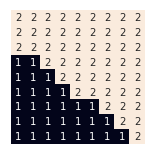

0.1 -277.1728820800781


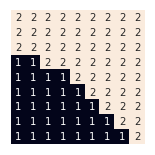

0.1 -282.01541900634766


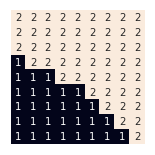

0.1 -266.01476287841797


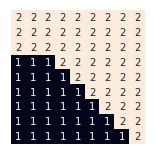

0.1 -245.69852447509766


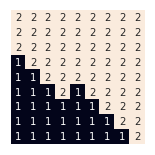

0.1 -210.22449493408203


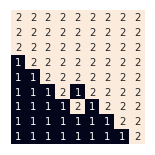

0.1 -279.90989685058594


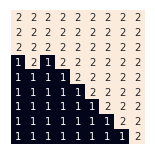

0.1 -204.64625549316406


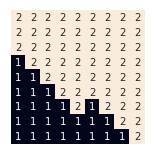

0.1 -276.3310012817383


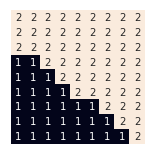

0.1 -280.8572998046875


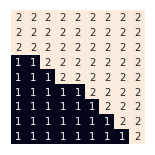

0.1 -223.5404052734375


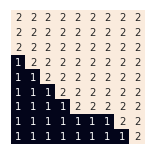

0.1 -238.38294219970703


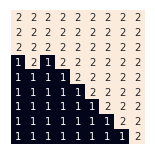

0.1 -194.1712417602539


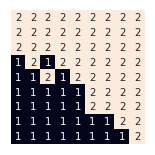

0.1 -239.43521118164062


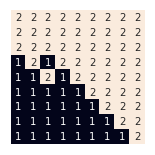

0.1 -196.01410675048828


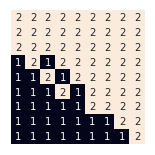

0.1 -254.85762786865234


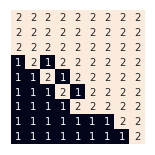

0.1 -200.43488311767578


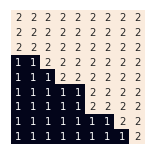

0.1 -218.43488311767578


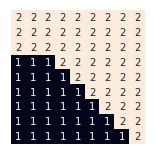

0.1 -172.85697174072266


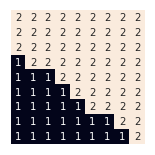

0.1 -240.69852447509766


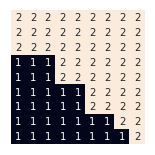

0.1 -226.33001708984375


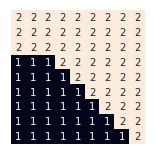

0.1 -246.6995086669922


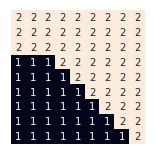

0.1 -229.01377868652344


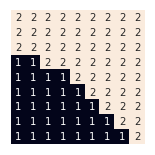

0.1 -262.7511215209961


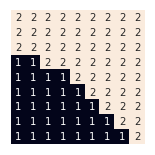

0.1 -184.43553924560547


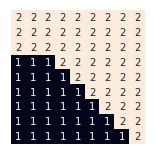

0.1 -224.96150970458984


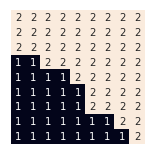

0.1 -275.0144348144531


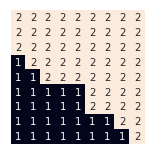

0.1 -206.64559936523438


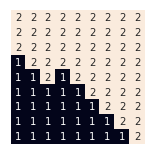

0.1 -205.9089126586914


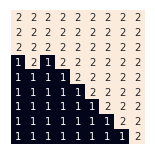

0.1 -252.2258071899414


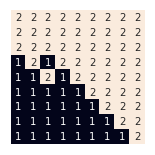

0.1 -230.59234619140625


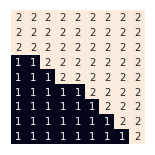

0.1 -244.33067321777344


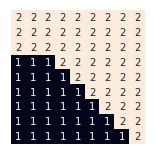

0.1 -267.4887924194336


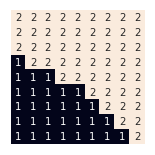

0.1 -227.96216583251953


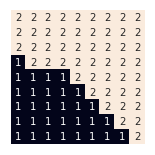

0.1 -253.69918060302734


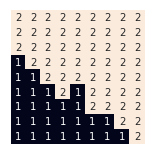

0.1 -277.5417175292969


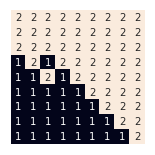

0.1 -250.06637573242188


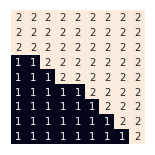

0.1 -292.69918060302734


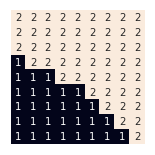

0.1 -226.961181640625


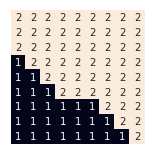

0.1 -256.9628219604492


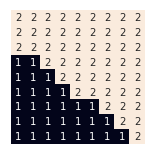

0.1 -216.2774200439453


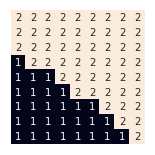

0.1 -209.5397491455078


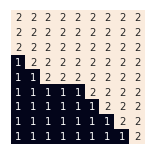

0.1 -284.5417175292969


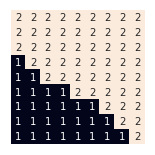

0.1 -236.64625549316406


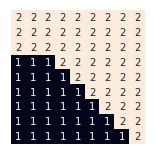

0.1 -307.48846435546875


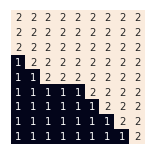

0.1 -254.59365844726562


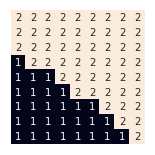

0.1 -265.4894485473633


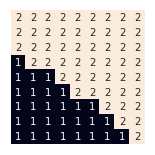

0.1 -268.1725540161133


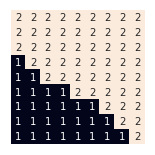

0.1 -226.06703186035156


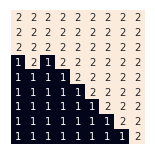

0.1 -157.75013732910156


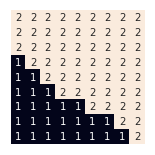

0.1 -267.38228607177734


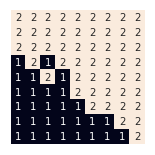

0.1 -230.90924072265625


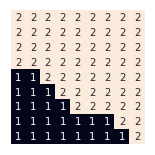

0.1 -255.5410614013672


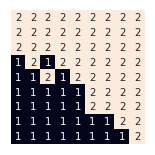

0.1 -234.11930084228516


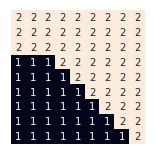

0.1 -192.59365844726562


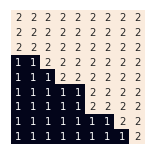

0.1 -205.59333038330078


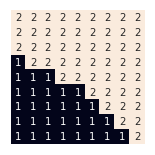

0.1 -243.01443481445312


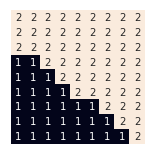

0.1 -208.80371856689453


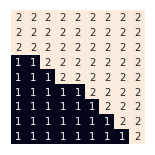

0.1 -240.22482299804688


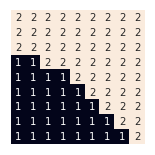

0.1 -248.9618377685547


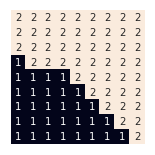

0.1 -240.17222595214844


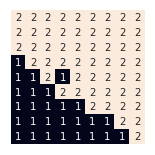

0.1 -196.1712417602539


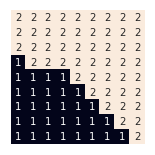

0.1 -231.80371856689453


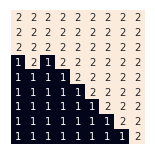

0.1 -223.43455505371094


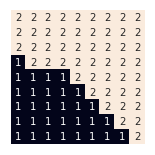

0.1 -218.22482299804688


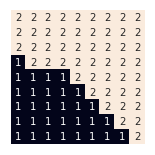

0.1 -268.59529876708984


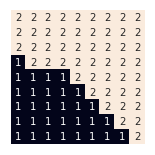

0.1 -197.5397491455078


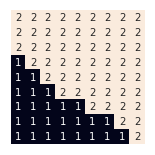

0.1 -221.64625549316406


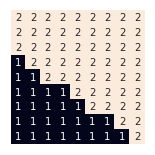

0.1 -212.85598754882812


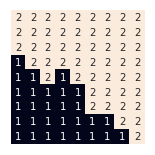

0.1 -181.43553924560547


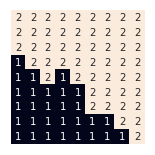

0.1 -239.80371856689453


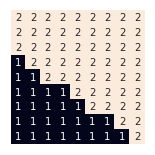

0.1 -263.3303451538086


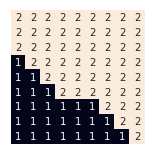

0.1 -233.54073333740234


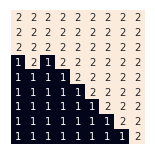

0.1 -247.90989685058594


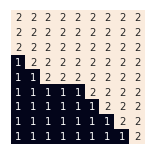

0.1 -264.06768798828125


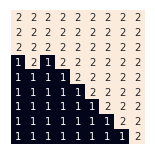

0.1 -176.64461517333984


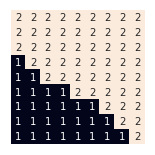

0.1 -243.3296890258789


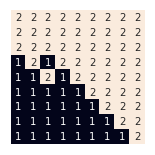

0.1 -231.85565948486328


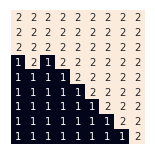

0.1 -211.43455505371094


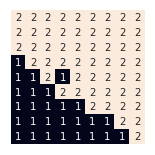

0.1 -279.43553924560547


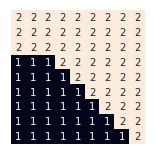

0.1 -209.1718978881836


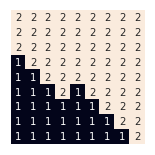

0.1 -167.06670379638672


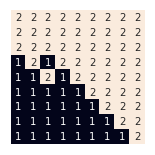

0.1 -255.01541900634766


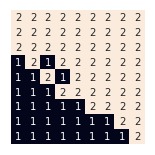

0.1 -209.7504653930664


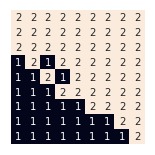

0.1 -240.64592742919922


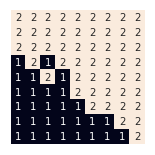

0.1 -277.4365234375


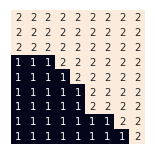

0.1 -185.38294219970703


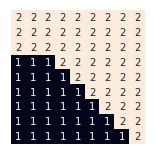

0.1 -199.38327026367188


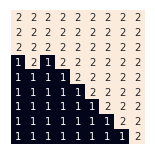

0.1 -221.5404052734375


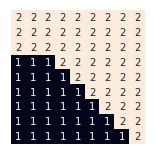

0.1 -232.9618377685547


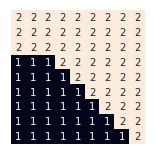

0.1 -203.48780822753906


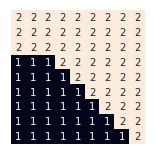

0.1 -229.06637573242188


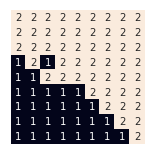

0.1 -225.54073333740234


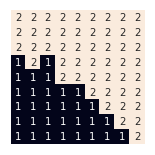

0.1 -189.80371856689453


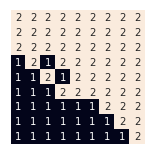

0.1 -164.1718978881836


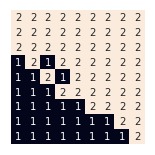

0.1 -265.4887924194336


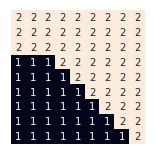

0.1 -229.17255401611328


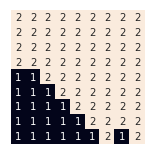

0.1 -295.1725540161133


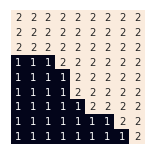

0.1 -235.8566436767578


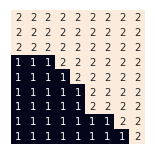

0.1 -266.06834411621094


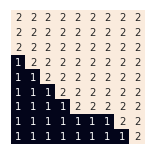

0.1 -221.80306243896484


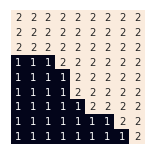

0.1 -273.90989685058594


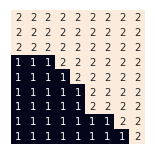

0.1 -240.69918060302734


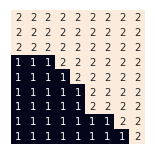

0.1 -223.4881362915039


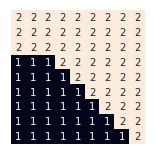

0.1 -205.3303451538086


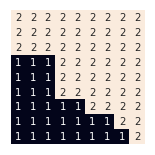

0.1 -216.6981964111328


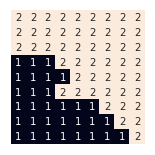

0.1 -269.6465835571289


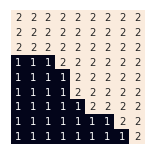

0.1 -209.5404052734375


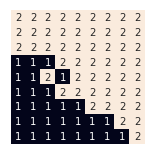

0.1 -199.75144958496094


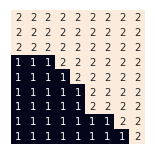

0.1 -254.64691162109375


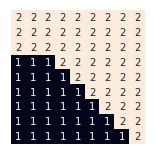

0.1 -221.38294219970703


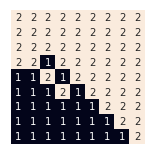

0.1 -257.85631561279297


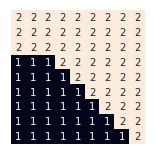

0.1 -199.43455505371094


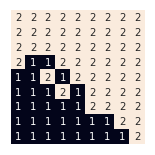

0.1 -265.69852447509766


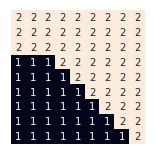

0.1 -235.5404052734375


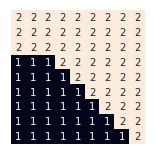

0.1 -231.33067321777344


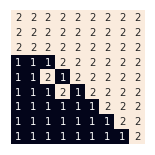

0.1 -273.6988525390625


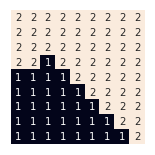

0.1 -184.4881362915039


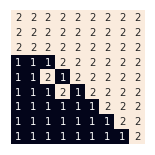

0.1 -189.11930084228516


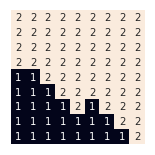

0.1 -235.9618377685547


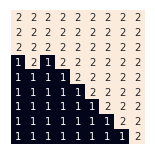

0.1 -220.8033905029297


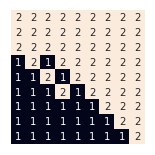

0.1 -304.69918060302734


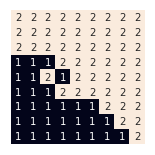

0.1 -235.11995697021484


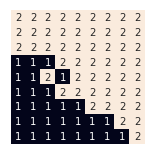

0.1 -280.27774810791016


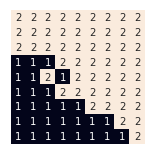

0.1 -252.4881362915039


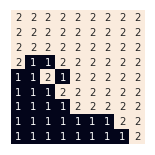

0.1 -293.59464263916016


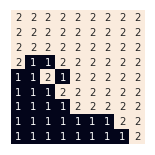

0.1 -222.33001708984375


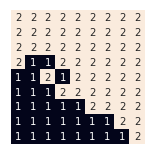

0.1 -202.85598754882812


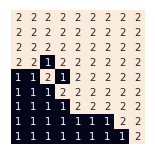

0.1 -247.8566436767578


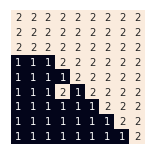

0.1 -213.80371856689453


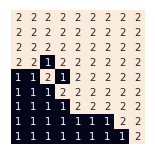

0.1 -262.0150909423828


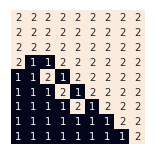

0.1 -200.3819580078125


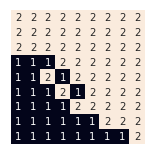

0.1 -197.22613525390625


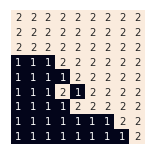

0.1 -247.54138946533203


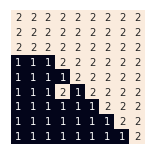

0.1 -240.54138946533203


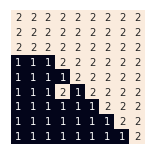

0.1 -219.90924072265625


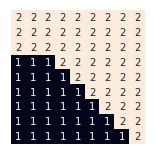

0.1 -227.11962890625


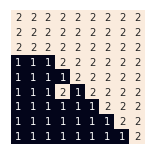

0.1 -252.6472396850586


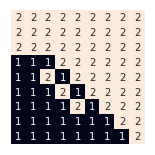

0.1 -230.27774810791016


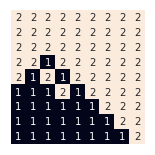

0.1 -205.54073333740234


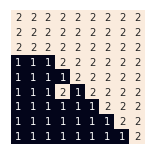

0.1 -217.85631561279297


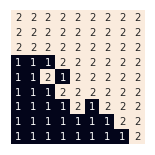

0.1 -170.6449432373047


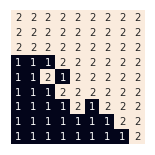

0.1 -278.9628219604492


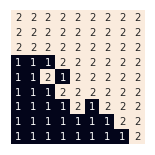

0.1 -299.9634780883789


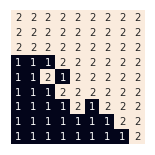

0.1 -225.17255401611328


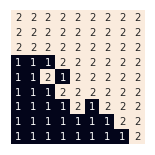

0.1 -158.85598754882812


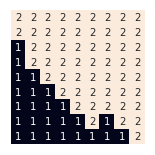

0.1 -240.90924072265625


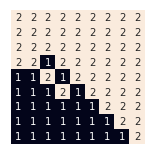

0.1 -187.85533142089844


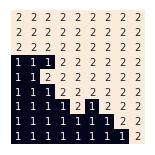

0.1 -266.1202850341797


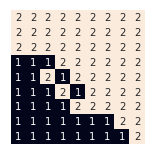

0.1 -238.22515106201172


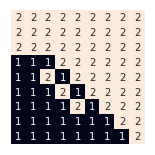

0.1 -267.27774810791016


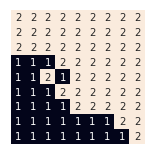

0.1 -191.90924072265625


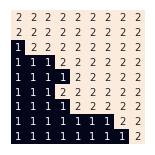

0.1 -274.0150909423828


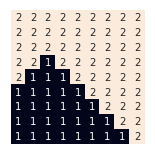

0.1 -235.33067321777344


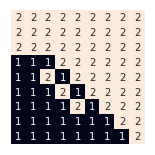

0.1 -244.22482299804688


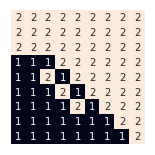

0.1 -247.54138946533203


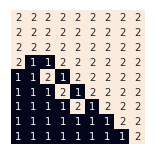

0.1 -199.27643585205078


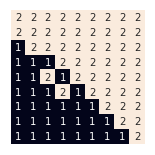

0.1 -218.8566436767578


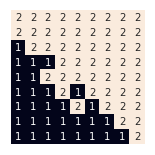

0.1 -231.38327026367188


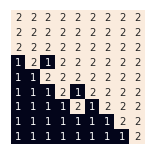

0.1 -254.54007720947266


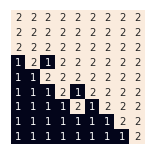

0.1 -211.644287109375


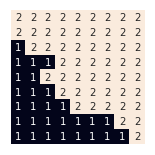

0.1 -194.96150970458984


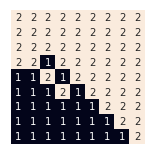

0.1 -230.48748016357422


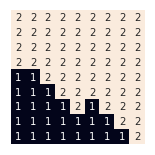

0.1 -181.75013732910156


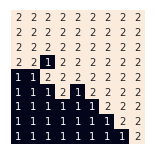

0.1 -258.96150970458984


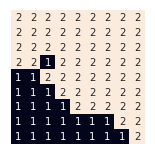

0.1 -208.1712417602539


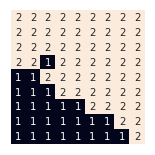

0.1 -233.17222595214844


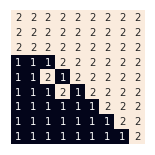

0.1 -211.1712417602539


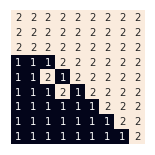

0.1 -186.59300231933594


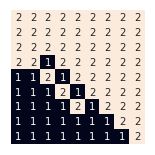

0.1 -209.48748016357422


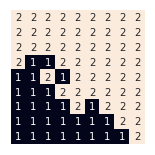

0.1 -248.4881362915039


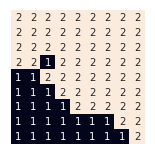

0.1 -243.69786834716797


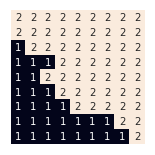

0.1 -278.38392639160156


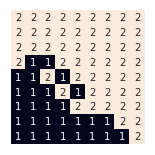

0.1 -254.11995697021484


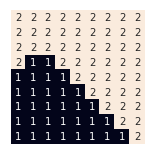

0.1 -165.96150970458984


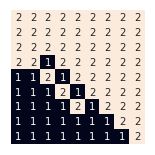

0.1 -255.11995697021484


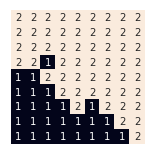

0.1 -243.27774810791016


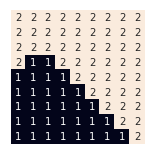

0.1 -240.80371856689453


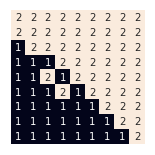

0.1 -233.1202850341797


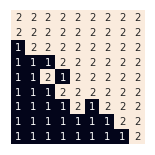

0.1 -243.4358673095703


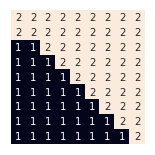

0.1 -226.54073333740234


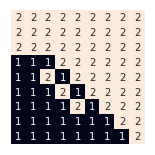

0.1 -244.85697174072266


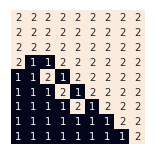

0.1 -219.0134506225586


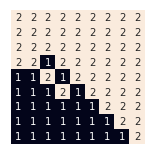

0.1 -231.75243377685547


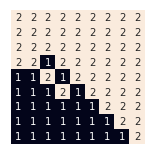

0.1 -212.5404052734375


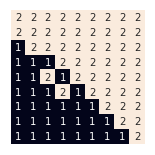

0.1 -270.4365234375


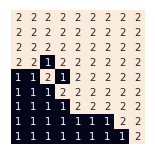

0.1 -251.6995086669922


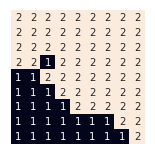

0.1 -252.6465835571289


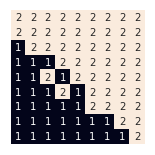

0.1 -220.85631561279297


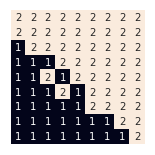

0.1 -262.4365234375


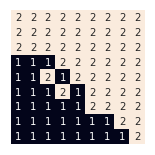

0.1 -204.17222595214844


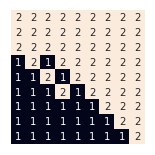

0.1 -225.85631561279297


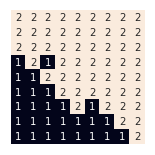

0.1 -261.22449493408203


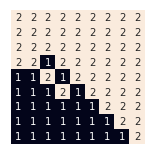

0.1 -273.48912048339844


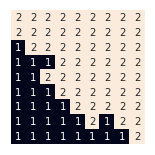

0.1 -247.33001708984375


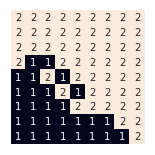

0.1 -235.64592742919922


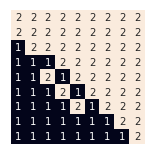

0.1 -219.38294219970703


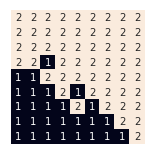

0.1 -264.59464263916016


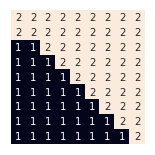

0.1 -177.3819580078125


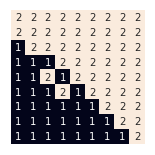

0.1 -246.85631561279297


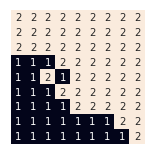

0.1 -325.80535888671875


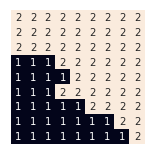

0.1 -202.64559936523438


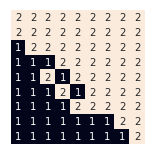

0.1 -216.3826141357422


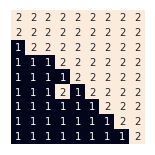

0.1 -175.85598754882812


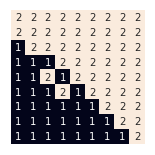

0.1 -265.3832702636719


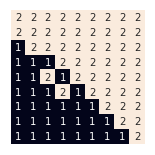

0.1 -169.06604766845703


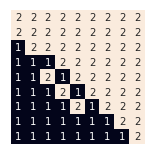

0.1 -214.06670379638672


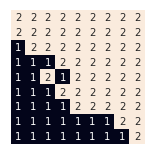

0.1 -232.802734375


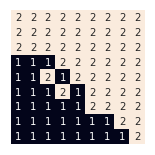

0.1 -225.64592742919922


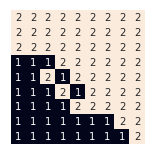

0.1 -249.3303451538086


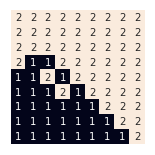

0.1 -208.06637573242188


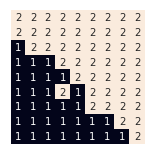

0.1 -272.75243377685547


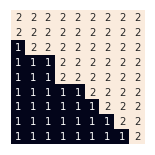

0.1 -228.0150909423828


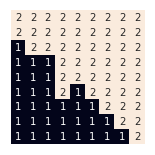

0.1 -226.06670379638672


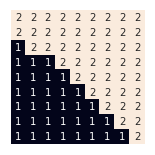

0.1 -244.69918060302734


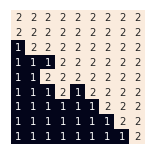

0.1 -281.06768798828125


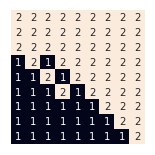

0.1 -194.43553924560547


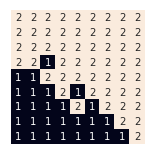

0.1 -243.90858459472656


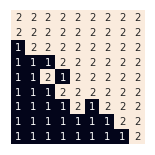

0.1 -266.2248229980469


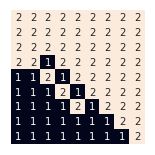

0.1 -217.33067321777344


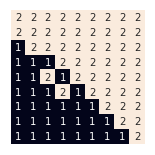

0.1 -268.1202850341797


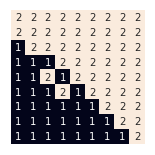

0.1 -224.69918060302734


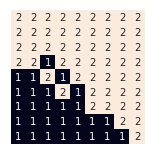

0.1 -277.3310012817383


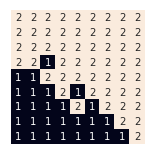

0.1 -237.9618377685547


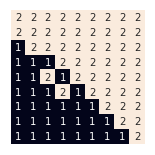

0.1 -263.2774200439453


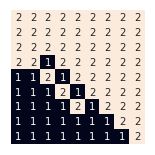

0.1 -259.5943145751953


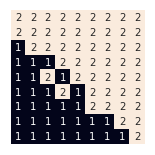

0.1 -167.11864471435547


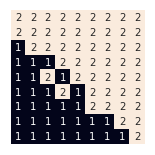

0.1 -230.59333038330078


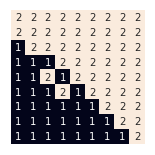

0.1 -226.80371856689453


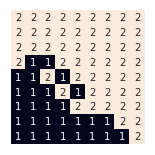

0.1 -241.7527618408203


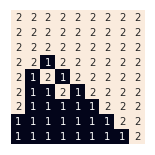

0.1 -184.80371856689453


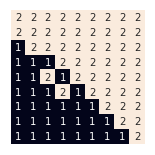

0.1 -256.33001708984375


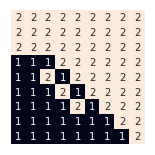

0.1 -228.01410675048828


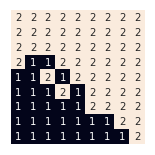

0.1 -166.90924072265625


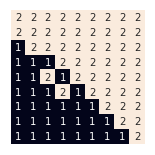

0.1 -246.27774810791016


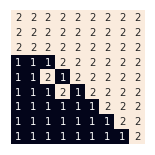

0.1 -226.7511215209961


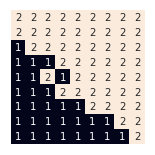

0.1 -277.64691162109375


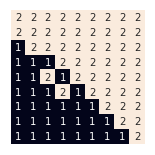

0.1 -236.12126922607422


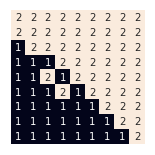

0.1 -238.90924072265625


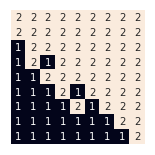

0.1 -211.3303451538086


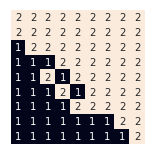

0.1 -271.0680160522461


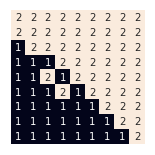

0.1 -229.69983673095703


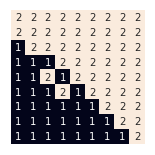

0.1 -253.0680160522461


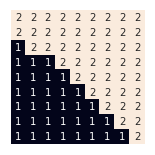

0.1 -220.38294219970703


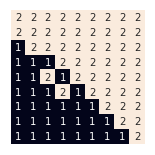

0.1 -232.43619537353516


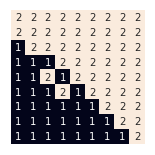

0.1 -219.3296890258789


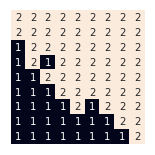

0.1 -212.3303451538086


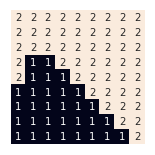

0.1 -218.75144958496094


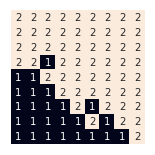

0.1 -233.75144958496094


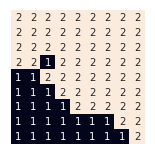

0.1 -267.48846435546875


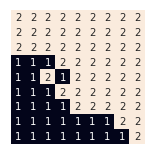

0.1 -211.01377868652344


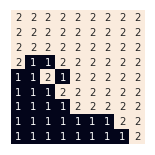

0.1 -231.38327026367188


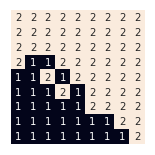

0.1 -251.3826141357422


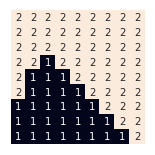

0.1 -196.8033905029297


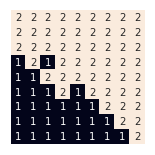

0.1 -240.17222595214844


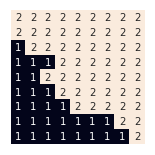

0.1 -228.96085357666016


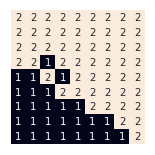

0.1 -223.22482299804688


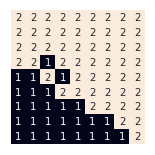

0.1 -164.69786834716797


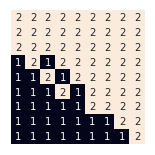

0.1 -238.48780822753906


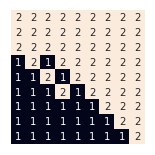

0.1 -228.01410675048828


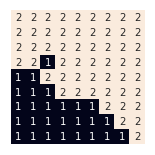

0.1 -230.64592742919922


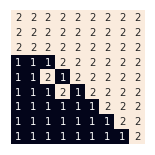

0.1 -190.7504653930664


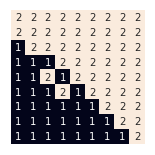

0.1 -219.22547912597656


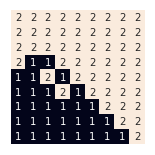

0.1 -281.6988525390625


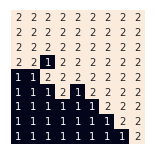

0.1 -224.17156982421875


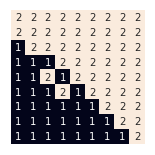

0.1 -207.38294219970703


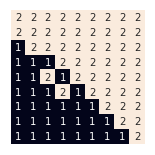

0.1 -228.69918060302734


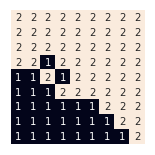

0.1 -248.6988525390625


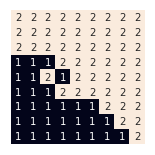

0.1 -179.9605255126953


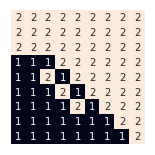

0.1 -264.0150909423828


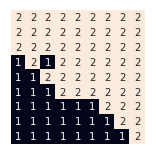

0.1 -195.22482299804688


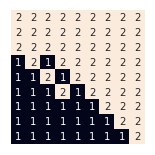

0.1 -234.48748016357422


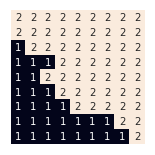

0.1 -222.4358673095703


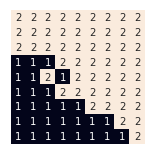

0.1 -236.4881362915039


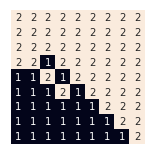

0.1 -270.9095687866211


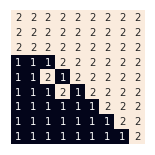

0.1 -188.11864471435547


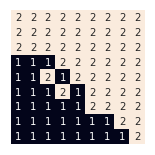

0.1 -269.54073333740234


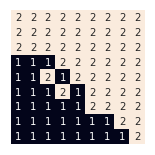

0.1 -200.48846435546875


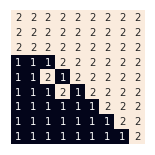

0.1 -256.9628219604492


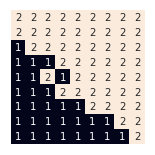

0.1 -245.54073333740234


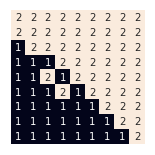

0.1 -273.48846435546875


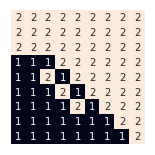

0.1 -219.38294219970703


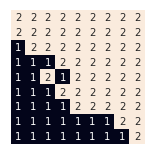

0.1 -263.06768798828125


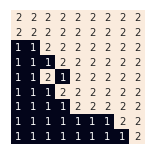

0.1 -256.64625549316406


In [ ]:
n_episodes=2000 
max_t=1000
eps_start=1.0
eps_end=0.1
eps_decay=0.995

scores = []
first_override = []
eps = eps_start
for i_episode in range(1, n_episodes + 1):
    env.reset()
    episode_reward = 0
    for t in range(max_t):
        episode_reward += runTurn(eps, verbose=False)
    eps = max(eps_end, eps*eps_decay)
    print(eps, episode_reward)
    plotPolicy(agents[1])

In [ ]:
env.chain.count('1') / len(env.chain)

In [ ]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.1, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    first_override = []
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(np.asarray(state), eps)
            next_state, reward = env.takeAction(action)
            reward_val = evalReward(reward)
            agent.step(state, action, reward_val, next_state)
            state = next_state
            score += reward_val
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps*eps_decay) # decrease epsilon
        print('\rEpisode {}\t  Score: {:.2f}'.format(i_episode, np.mean(score)))
        print(eps)
        # plot 
        policy = agent.extractPolicy()
        if policy[(1,0)] == 2:
            first_override.append(i_episode)
        f, ax = plt.subplots(figsize=(3,3))
        ax.imshow(policy)
        ax = sns.heatmap(policy, annot=True)
        cb = ax.collections[-1].colorbar   
        cb.remove()
        plt.xticks([])
        plt.yticks([])
        plt.show()
    return scores, first_override

scores, overrides = dqn()

In [ ]:
state = torch.from_numpy(np.asarray([1, 0])).float().unsqueeze(0).to("cpu")
agent.qnetwork_local.eval()
with torch.no_grad():
    action_values = agent.qnetwork_local(state)

In [ ]:
action_values

In [ ]:
# plot the scores
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
np.mean(scores[500:])

In [ ]:
0.35*1000 * (1 - rho) - rho * 0.35*1000